**As a first step install and import necessary libraries**

In [ ]:
!pip install catboost
!pip install pygam



In [ ]:
# Core data manipulation and analysis
import pandas as pd
import numpy as np
from tabulate import tabulate

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno  # For missing data visualization

# Statistical analysis
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Utilities
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Upload Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DataChicagoPublicSchoolsProgressReportCards.xlsx to DataChicagoPublicSchoolsProgressReportCards.xlsx


In [ ]:
df = pd.read_excel('/content/DataChicagoPublicSchoolsProgressReportCards.xlsx',sheet_name='SAS DATA')

In [ ]:
df.columns

Index(['Unnamed: 0', 'Name of School', 'SchoolID', 'Safety Icon ',
       'Safety Score', 'Family Involvement Icon', 'Family Involvement Score',
       'Environment Icon ', 'Environment Score', 'Instruction Icon ',
       'Instruction Score', 'Teachers Icon ', 'Teachers Score',
       'Parent Engagement Icon ', 'Parent Engagement Score',
       'Parent Environment Icon', 'Parent Environment Score',
       'Average Student Attendance', 'Rate of Misconducts (per 100 students) ',
       'Average Teacher Attendance',
       'Individualized Education Program Compliance Rate ',
       'ISAT Exceeding Math %', 'ISAT Exceeding Reading % ',
       'ISAT Value Add Math', 'ISAT Value Add Read'],
      dtype='object')

In [ ]:
df.head()

Unnamed: 0                       Name of School  SchoolID  \
0         NaN                                    .         .   
1         NaN                                  NaN  SchoolID   
2         NaN  Charles G Hammond Elementary School    609966   
3         NaN      Marvin Camras Elementary School    610539   
4         NaN     Eliza Chappell Elementary School    609852   

                       Safety Icon  Safety Score Family Involvement Icon  \
0  (1 =1, 2 = 2; 3 = 3; 4= 4; 5 =5)          NaN   (1=1,2=2,3=3,4=4,5=5)   
1                          Safeicon    safescore              faminvicon   
2                                 3           40                       .   
3                                 3           54                       3   
4                                 4           70                       4   

  Family Involvement Score Environment Icon  Environment Score  \
0                      NaN               NaN               NaN   
1              faminvscore           envicon          envscore   
2                        .                 3                41   
3                       58                 2                37   
4                       65                 3                53   

  Instruction Icon   ... Parent Environment Icon Parent Environment Score  \
0               NaN  ...                     NaN                      NaN   
1         instricon  ...              parenvicon              parenvscore   
2                 3  ...                       2                       45   
3                 3  ...                       4                       55   
4                 3  ...                       3                       52   

  Average Student Attendance Rate of Misconducts (per 100 students)   \
0                        NaN                                     NaN   
1                   avgstatt                                ratemisc   
2                       95.3                                     8.5   
3                       95.1                                     4.3   
4                       95.1                                     2.9   

  Average Teacher Attendance  \
0                        NaN   
1                avgteachatt   
2                       95.2   
3                          0   
4                       96.7   

  Individualized Education Program Compliance Rate  ISAT Exceeding Math %  \
0                                               NaN                   NaN   
1                                      eduprogcompl           isatmathper   
2                                                92                  10.1   
3                                              97.7                  11.2   
4                                              98.9                  19.6   

  ISAT Exceeding Reading %  ISAT Value Add Math ISAT Value Add Read  
0                       NaN                 NaN                 NaN  
1               isatreadper         isatvalmath         isatvalread  
2                       5.8                 0.5                 0.2  
3                        12                -1.8                -0.3  
4                      17.6                 0.4                   1  

[5 rows x 25 columns]

In [ ]:
df.tail()

Unnamed: 0                      Name of School SchoolID Safety Icon   \
474         NaN  Daniel J Corkery Elementary School   609870            2   
475         NaN                                   .        .            .   
476         NaN                                   .        .            .   
477         NaN                                   .        .            .   
478         NaN                                   .        .            .   

    Safety Score Family Involvement Icon Family Involvement Score  \
474           39                       .                        .   
475            .                       .                        .   
476            .                       .                        .   
477            .                       .                        .   
478            .                       .                        .   

    Environment Icon  Environment Score Instruction Icon   ...  \
474                 2                31                 2  ...   
475                 .                 .                 .  ...   
476                 .                 .                 .  ...   
477                 .                 .                 .  ...   
478                 .                 .                 .  ...   

    Parent Environment Icon Parent Environment Score  \
474                       .                        .   
475                       .                        .   
476                       .                        .   
477                       .                        .   
478                       .                        .   

    Average Student Attendance Rate of Misconducts (per 100 students)   \
474                       94.7                                    18.1   
475                          .                                       .   
476                          .                                       .   
477                          .                                       .   
478                          .                                       .   

    Average Teacher Attendance  \
474                       97.2   
475                          .   
476                          .   
477                          .   
478                          .   

    Individualized Education Program Compliance Rate  ISAT Exceeding Math %  \
474                                               100                  13.6   
475                                                 .                     .   
476                                                 .                     .   
477                                                 .                     .   
478                                                 .                     .   

    ISAT Exceeding Reading %  ISAT Value Add Math ISAT Value Add Read  
474                       8.2                 0.1                 0.3  
475                         .                   .                   .  
476                         .                   .                   .  
477                         .                   .                   .  
478                         .                   .                   .  

[5 rows x 25 columns]

In [ ]:
import pandas as pd

# Define the variables, their measurement types, and roles
data = {
    "Variable Name": [
        "Safety Icon", "Safety Score", "Family Involvement Icon",
        "Family Involvement Score", "Environment Icon", "Environment Score",
        "Instruction Icon", "Instruction Score", "Teachers Icon",
        "Teachers Score", "Parent Engagement Icon", "Parent Engagement Score",
        "Parent Environment Icon", "Parent Environment Score",
        "Average Student Attendance", "Rate of Misconducts (per 100 students)",
        "Average Teacher Attendance", "Individualized Education Program Compliance Rate",
        "ISAT Exceeding Math %", "ISAT Exceeding Reading %",
        "ISAT Value Add Math", "ISAT Value Add Read", "Unnamed: 0",
        "School Name", "Student ID"
    ],
    "Measurement Type": [
        "Categorical", "Numeric", "Categorical",
        "Numeric", "Categorical", "Numeric",
        "Categorical", "Numeric", "Categorical",
        "Numeric", "Categorical", "Numeric",
        "Categorical", "Numeric", "Numeric",
        "Numeric", "Numeric", "Numeric",
        "Numeric", "Numeric", "Numeric",
        "Numeric", "Numeric", "Categorical",
        "Numeric"
    ],
    "Role": [
        "Predictor", "outcome", "Predictor",
        "Predictor", "Predictor", "Predictor",
        "Predictor", "Predictor", "Predictor",
        "Predictor", "Predictor", "Predictor",
        "Excluded", "Predictor", "Predictor",
        "Predictor", "Predictor", "Predictor",
        "outcome", "Predictor", "Outcome",
        "Outcome", "Excluded", "Excluded",
        "Excluded"
    ]
}

# Create a DataFrame
variables_table = pd.DataFrame(data)


# Display the table in a clean format using tabulate
print(tabulate(variables_table, headers="keys", tablefmt="pretty", showindex=False))

+--------------------------------------------------+------------------+-----------+
|                  Variable Name                   | Measurement Type |   Role    |
+--------------------------------------------------+------------------+-----------+
|                   Safety Icon                    |   Categorical    | Predictor |
|                   Safety Score                   |     Numeric      |  outcome  |
|             Family Involvement Icon              |   Categorical    | Predictor |
|             Family Involvement Score             |     Numeric      | Predictor |
|                 Environment Icon                 |   Categorical    | Predictor |
|                Environment Score                 |     Numeric      | Predictor |
|                 Instruction Icon                 |   Categorical    | Predictor |
|                Instruction Score                 |     Numeric      | Predictor |
|                  Teachers Icon                   |   Categorical    | Pred

In [ ]:
# prompt: drop first 2 rows

df = df.iloc[2:]


In [ ]:
df = df.drop(columns=['Unnamed: 0', 'Name of School', 'SchoolID'])
df = df[:-4]

In [ ]:
df.columns

Index(['Safety Icon ', 'Safety Score', 'Family Involvement Icon',
       'Family Involvement Score', 'Environment Icon ', 'Environment Score',
       'Instruction Icon ', 'Instruction Score', 'Teachers Icon ',
       'Teachers Score', 'Parent Engagement Icon ', 'Parent Engagement Score',
       'Parent Environment Icon', 'Parent Environment Score',
       'Average Student Attendance', 'Rate of Misconducts (per 100 students) ',
       'Average Teacher Attendance',
       'Individualized Education Program Compliance Rate ',
       'ISAT Exceeding Math %', 'ISAT Exceeding Reading % ',
       'ISAT Value Add Math', 'ISAT Value Add Read'],
      dtype='object')

In [ ]:
# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Verify the column names
print(df.columns)

Index(['Safety Icon', 'Safety Score', 'Family Involvement Icon',
       'Family Involvement Score', 'Environment Icon', 'Environment Score',
       'Instruction Icon', 'Instruction Score', 'Teachers Icon',
       'Teachers Score', 'Parent Engagement Icon', 'Parent Engagement Score',
       'Parent Environment Icon', 'Parent Environment Score',
       'Average Student Attendance', 'Rate of Misconducts (per 100 students)',
       'Average Teacher Attendance',
       'Individualized Education Program Compliance Rate',
       'ISAT Exceeding Math %', 'ISAT Exceeding Reading %',
       'ISAT Value Add Math', 'ISAT Value Add Read'],
      dtype='object')


In [ ]:
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 473 rows and 22 columns.


# Exploratory Data Science

In [ ]:
# Display dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 2 to 474
Data columns (total 22 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Safety Icon                                       473 non-null    object
 1   Safety Score                                      473 non-null    object
 2   Family Involvement Icon                           473 non-null    object
 3   Family Involvement Score                          473 non-null    object
 4   Environment Icon                                  473 non-null    object
 5   Environment Score                                 473 non-null    object
 6   Instruction Icon                                  473 non-null    object
 7   Instruction Score                                 473 non-null    object
 8   Teachers Icon                                     473 non-null    object
 9   Teachers Score                  

In [ ]:
# List of columns to convert to numeric
numeric_columns = [
    'Safety Score', 'Family Involvement Score', 'Environment Score',
    'Instruction Score', 'Teachers Score', 'Parent Engagement Score',
    'Parent Environment Score', 'Average Student Attendance',
    'Rate of Misconducts (per 100 students)', 'Average Teacher Attendance',
    'Individualized Education Program Compliance Rate',
    'ISAT Exceeding Math %', 'ISAT Exceeding Reading %',
    'ISAT Value Add Math', 'ISAT Value Add Read'
]

# Convert columns to numeric, coercing errors to NaN
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check the data types after conversion
print(df.dtypes)

Safety Icon                                          object
Safety Score                                        float64
Family Involvement Icon                              object
Family Involvement Score                            float64
Environment Icon                                     object
Environment Score                                   float64
Instruction Icon                                     object
Instruction Score                                   float64
Teachers Icon                                        object
Teachers Score                                      float64
Parent Engagement Icon                               object
Parent Engagement Score                             float64
Parent Environment Icon                              object
Parent Environment Score                            float64
Average Student Attendance                          float64
Rate of Misconducts (per 100 students)              float64
Average Teacher Attendance              

In [ ]:
df.describe()

Safety Score  Family Involvement Score  Environment Score  \
count    428.000000                245.000000         428.000000   
mean      49.481308                 51.159184          48.172897   
std       20.211461                 18.922057          16.382661   
min        1.000000                  6.000000           1.000000   
25%       34.750000                 37.000000          37.000000   
50%       47.000000                 49.000000          48.000000   
75%       62.000000                 63.000000          58.250000   
max       99.000000                 99.000000          99.000000   

       Instruction Score  Teachers Score  Parent Engagement Score  \
count         428.000000      243.000000               392.000000   
mean           49.077103       49.991770                50.058673   
std            17.764690       18.237187                 5.052575   
min             1.000000        8.000000                37.000000   
25%            38.000000       36.000000                47.000000   
50%            49.000000       48.000000                50.000000   
75%            60.000000       61.500000                52.000000   
max            99.000000       99.000000                69.000000   

       Parent Environment Score  Average Student Attendance  \
count                392.000000                  472.000000   
mean                  50.318878                   94.037924   
std                    4.651854                    3.043887   
min                   37.000000                   60.900000   
25%                   47.000000                   92.800000   
50%                   50.000000                   94.900000   
75%                   53.000000                   95.700000   
max                   70.000000                   98.400000   

       Rate of Misconducts (per 100 students)  Average Teacher Attendance  \
count                              473.000000                  473.000000   
mean                                22.165116                   94.968710   
std                                 29.430773                    8.837521   
min                                  0.000000                    0.000000   
25%                                  4.400000                   95.100000   
50%                                 12.200000                   95.800000   
75%                                 28.500000                   96.500000   
max                                251.600000                   98.500000   

       Individualized Education Program Compliance Rate  \
count                                        473.000000   
mean                                          98.940169   
std                                            2.008476   
min                                           86.900000   
25%                                           98.600000   
50%                                          100.000000   
75%                                          100.000000   
max                                          100.000000   

       ISAT Exceeding Math %  ISAT Exceeding Reading %  ISAT Value Add Math  \
count             466.000000                466.000000           458.000000   
mean               19.780258                 15.354506             0.098908   
std                15.989414                 14.859395             1.019900   
min                 0.000000                  0.000000            -3.500000   
25%                 9.100000                  6.100000            -0.575000   
50%                15.750000                 10.900000             0.100000   
75%                24.625000                 19.350000             0.700000   
max               100.000000                100.000000             3.600000   

       ISAT Value Add Read  
count           458.000000  
mean              0.042795  
std               1.042259  
min              -5.000000  
25%              -0.600000  
50%               0.000000  
75%               0.700000  
max               4.900000

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Safety Icon                                           0
Safety Score                                         45
Family Involvement Icon                               0
Family Involvement Score                            228
Environment Icon                                      0
Environment Score                                    45
Instruction Icon                                      0
Instruction Score                                    45
Teachers Icon                                         0
Teachers Score                                      230
Parent Engagement Icon                                0
Parent Engagement Score                              81
Parent Environment Icon                               0
Parent Environment Score                             81
Average Student Attendance                            1
Rate of Misconducts (per 100 students)                0
Average Teacher Attendance                            0
Individualized Education Progra

In [ ]:
# List of numeric columns to impute
numeric_columns = [
    'Safety Score', 'Family Involvement Score', 'Environment Score',
    'Instruction Score', 'Teachers Score', 'Parent Engagement Score',
    'Parent Environment Score', 'Average Student Attendance',
    'Rate of Misconducts (per 100 students)', 'Average Teacher Attendance',
    'Individualized Education Program Compliance Rate',
    'ISAT Exceeding Math %', 'ISAT Exceeding Reading %',
    'ISAT Value Add Math', 'ISAT Value Add Read'
]

# Impute missing values with the median
for col in numeric_columns:
    median_value = df[col].median()  # Calculate the median
    df[col].fillna(median_value, inplace=True)  # Fill missing values

In [ ]:
# List of categorical columns to impute
categorical_columns = [
    'Safety Icon', 'Family Involvement Icon', 'Environment Icon',
    'Instruction Icon', 'Teachers Icon', 'Parent Engagement Icon',
    'Parent Environment Icon'
]

# Impute missing values with the mode
for col in categorical_columns:
    mode_value = df[col].mode()[0]  # Calculate the mode
    df[col].fillna(mode_value, inplace=True)  # Fill missing values

In [ ]:
# Check for missing values after imputation
missing_values_after_imputation = df.isnull().sum()
print("Missing Values After Imputation:\n", missing_values_after_imputation)

Missing Values After Imputation:
 Safety Icon                                         0
Safety Score                                        0
Family Involvement Icon                             0
Family Involvement Score                            0
Environment Icon                                    0
Environment Score                                   0
Instruction Icon                                    0
Instruction Score                                   0
Teachers Icon                                       0
Teachers Score                                      0
Parent Engagement Icon                              0
Parent Engagement Score                             0
Parent Environment Icon                             0
Parent Environment Score                            0
Average Student Attendance                          0
Rate of Misconducts (per 100 students)              0
Average Teacher Attendance                          0
Individualized Education Program Compliance Rate

In [ ]:
from sklearn.impute import KNNImputer

# Initialize the KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Apply KNN Imputation to numeric columns
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

In [ ]:
# Check for duplicate rows
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


In [ ]:
# List of categorical columns
categorical_columns = [
    'Safety Icon', 'Family Involvement Icon', 'Environment Icon',
    'Instruction Icon', 'Teachers Icon', 'Parent Engagement Icon',
    'Parent Environment Icon'
]

# Replace '.' and nan with meaningful values
for col in categorical_columns:
    df[col] = df[col].replace({'.': 'unknown', float('nan'): 'missing'})

# Verify unique values after replacement
for col in categorical_columns:
    print(f"Unique values in {col}:\n", df[col].unique())

Unique values in Safety Icon:
 [3 4 2 5 'unknown' 1]
Unique values in Family Involvement Icon:
 ['unknown' 3 4 5 2 1]
Unique values in Environment Icon:
 [3 2 4 5 'unknown' 1]
Unique values in Instruction Icon:
 [3 2 4 5 'unknown' 1]
Unique values in Teachers Icon:
 ['unknown' 5 3 4 2 1]
Unique values in Parent Engagement Icon:
 [2 3 'unknown' 4]
Unique values in Parent Environment Icon:
 [2 4 3 'unknown']


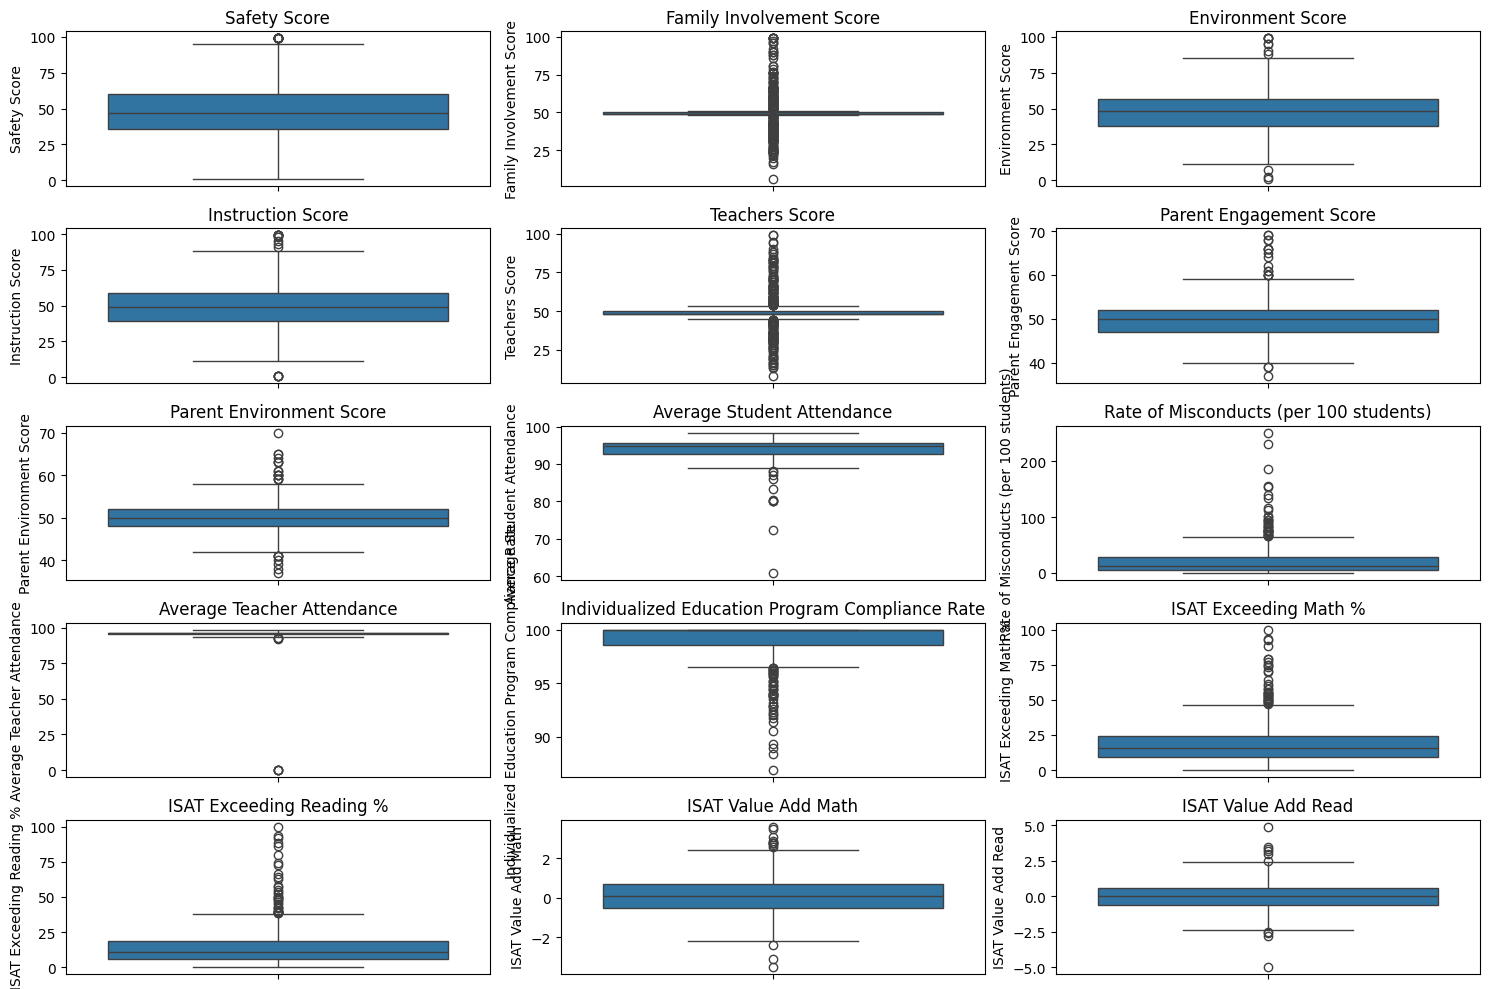

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns
numeric_columns = [
    'Safety Score', 'Family Involvement Score', 'Environment Score',
    'Instruction Score', 'Teachers Score', 'Parent Engagement Score',
    'Parent Environment Score', 'Average Student Attendance',
    'Rate of Misconducts (per 100 students)', 'Average Teacher Attendance',
    'Individualized Education Program Compliance Rate',
    'ISAT Exceeding Math %', 'ISAT Exceeding Reading %',
    'ISAT Value Add Math', 'ISAT Value Add Read'
]

# Plot boxplots for numeric columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
# Function to detect outliers using IQR
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Detect outliers in numeric columns
outliers_dict = {}
for col in numeric_columns:
    outliers = detect_outliers(df[col])
    outliers_dict[col] = outliers
    print(f"Outliers in {col}:\n", outliers)

Outliers in Safety Score:
 12     99.0
30     99.0
41     99.0
118    99.0
166    99.0
172    99.0
197    99.0
207    99.0
233    99.0
237    99.0
266    99.0
269    99.0
277    99.0
389    99.0
425    99.0
438    99.0
439    99.0
Name: Safety Score, dtype: float64
Outliers in Family Involvement Score:
 3      58.0
4      65.0
8      58.0
10     47.0
12     99.0
       ... 
464    43.0
465    57.0
468    47.0
469    73.0
473    32.0
Name: Family Involvement Score, Length: 226, dtype: float64
Outliers in Environment Score:
 13     99.0
38     99.0
41     88.0
103     1.0
118    95.0
157     7.0
166    95.0
172    99.0
218     2.0
277    99.0
373    90.0
Name: Environment Score, dtype: float64
Outliers in Instruction Score:
 13     99.0
38     99.0
54      1.0
69     99.0
101    91.0
103     1.0
166    95.0
172    99.0
218     1.0
262    93.0
268     1.0
277    99.0
295    99.0
363    98.0
404     1.0
Name: Instruction Score, dtype: float64
Outliers in Teachers Score:
 3      88.0
8     

In [ ]:
import numpy as np
import pandas as pd

def handle_outliers(df):
    """
    Handle outliers in the school metrics dataset using various techniques.
    Returns a cleaned DataFrame with outliers treated.
    """

    # Make a copy of the original dataframe
    cleaned_df = df.copy()

    # 1. Safety Score - Winsorize at 95th percentile (many at 99.0)
    upper_limit = cleaned_df['Safety Score'].quantile(0.95)
    cleaned_df['Safety Score'] = cleaned_df['Safety Score'].clip(upper=upper_limit)

    # 2. Family Involvement Score - Winsorize at 5th and 95th percentiles
    lower, upper = cleaned_df['Family Involvement Score'].quantile([0.05, 0.95])
    cleaned_df['Family Involvement Score'] = cleaned_df['Family Involvement Score'].clip(lower, upper)

    # 3. Environment Score - Trim extreme low values (<5)
    cleaned_df = cleaned_df[cleaned_df['Environment Score'] >= 5]

    # 4. Instruction Score - Trim extreme low values (<5)
    cleaned_df = cleaned_df[cleaned_df['Instruction Score'] >= 5]

    # 5. Teachers Score - Winsorize at 5th and 95th percentiles
    lower, upper = cleaned_df['Teachers Score'].quantile([0.05, 0.95])
    cleaned_df['Teachers Score'] = cleaned_df['Teachers Score'].clip(lower, upper)

    # 6. Parent Engagement Score - Bin into categories
    bins = [0, 30, 70, 100]
    labels = ['Low', 'Medium', 'High']
    cleaned_df['Parent Engagement Category'] = pd.cut(cleaned_df['Parent Engagement Score'],
                                                   bins=bins, labels=labels)

    # 7. Parent Environment Score - Winsorize at 95th percentile
    upper_limit = cleaned_df['Parent Environment Score'].quantile(0.95)
    cleaned_df['Parent Environment Score'] = cleaned_df['Parent Environment Score'].clip(upper=upper_limit)

    # 8. Average Student Attendance - Trim extremes (<70 or >95)
    cleaned_df = cleaned_df[(cleaned_df['Average Student Attendance'] >= 70) &
                          (cleaned_df['Average Student Attendance'] <= 95)]

    # 9. Rate of Misconducts - Log transform and trim extreme high values
    cleaned_df['Log_Misconducts'] = np.log1p(cleaned_df['Rate of Misconducts (per 100 students)'])
    cleaned_df = cleaned_df[cleaned_df['Rate of Misconducts (per 100 students)'] < 150]

    # 10. Average Teacher Attendance - Impute 0 values with median
    median_attendance = cleaned_df['Average Teacher Attendance'].median()
    cleaned_df['Average Teacher Attendance'] = cleaned_df['Average Teacher Attendance'].replace(
        0, median_attendance)

    # 11. IEP Compliance Rate - No action needed (high values expected)

    # 12. ISAT Exceeding Math % - Winsorize at 99th percentile
    upper_limit = cleaned_df['ISAT Exceeding Math %'].quantile(0.99)
    cleaned_df['ISAT Exceeding Math %'] = cleaned_df['ISAT Exceeding Math %'].clip(upper=upper_limit)

    # 13. ISAT Exceeding Reading % - Winsorize at 99th percentile
    upper_limit = cleaned_df['ISAT Exceeding Reading %'].quantile(0.99)
    cleaned_df['ISAT Exceeding Reading %'] = cleaned_df['ISAT Exceeding Reading %'].clip(upper=upper_limit)

    # 14. ISAT Value Add Math - Trim extreme values (beyond ±3)
    cleaned_df = cleaned_df[(cleaned_df['ISAT Value Add Math'] >= -3) &
                          (cleaned_df['ISAT Value Add Math'] <= 3)]

    # 15. ISAT Value Add Read - Trim extreme values (beyond ±3)
    cleaned_df = cleaned_df[(cleaned_df['ISAT Value Add Read'] >= -3) &
                          (cleaned_df['ISAT Value Add Read'] <= 3)]

    return cleaned_df



# Apply outlier handling
cleaned_data = handle_outliers(df)



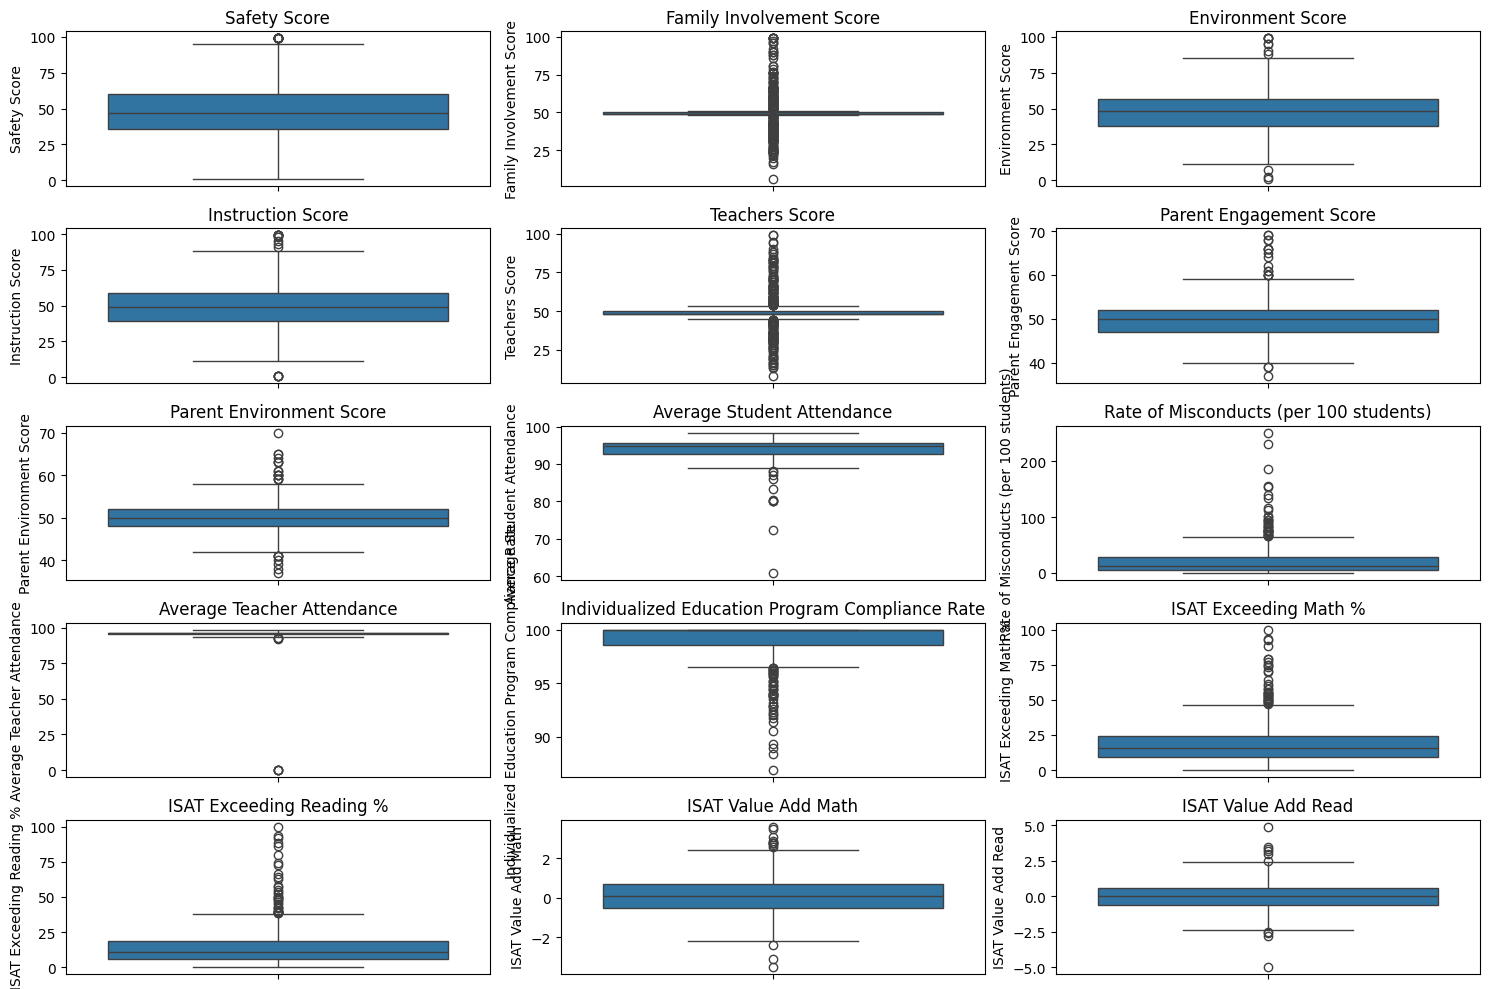

In [ ]:
# Plot boxplots again to check for outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
# Compute the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

                                                  Safety Score  \
Safety Score                                          1.000000   
Family Involvement Score                              0.484078   
Environment Score                                     0.553616   
Instruction Score                                     0.317536   
Teachers Score                                        0.287939   
Parent Engagement Score                               0.430547   
Parent Environment Score                              0.045406   
Average Student Attendance                            0.395870   
Rate of Misconducts (per 100 students)               -0.383537   
Average Teacher Attendance                           -0.006080   
Individualized Education Program Compliance Rate     -0.027502   
ISAT Exceeding Math %                                 0.683332   
ISAT Exceeding Reading %                              0.680399   
ISAT Value Add Math                                   0.130076   
ISAT Value

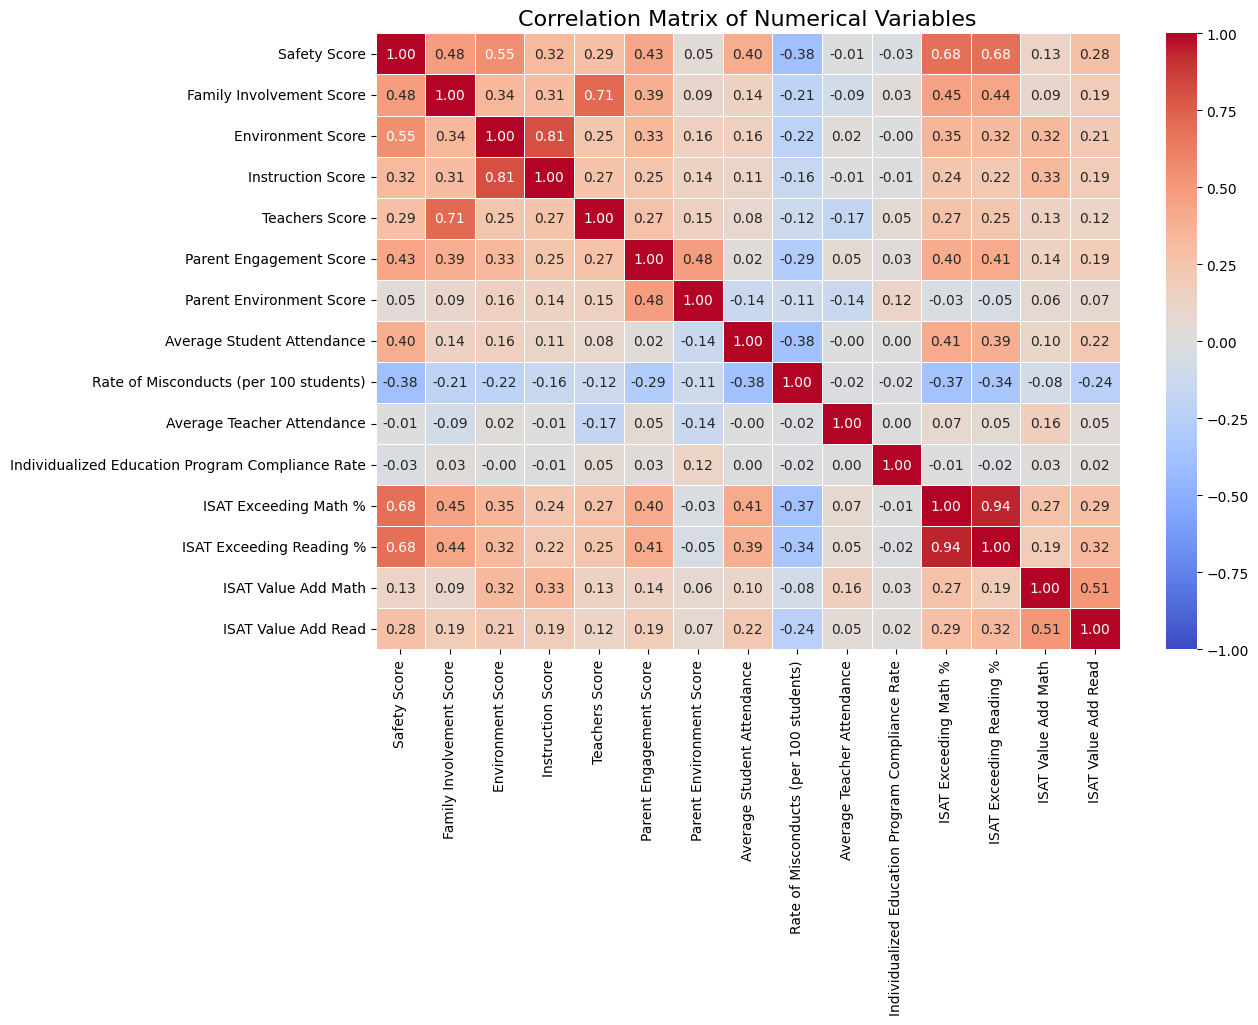

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,  # Annotate the heatmap with the correlation values
    fmt=".2f",   # Format the annotations to 2 decimal places
    cmap="coolwarm",  # Use a cool-to-warm color scale
    vmin=-1, vmax=1,  # Set the range of the color scale
    linewidths=0.5    # Add lines between cells
)

# Add a title
plt.title("Correlation Matrix of Numerical Variables", fontsize=16)

# Display the heatmap
plt.show()

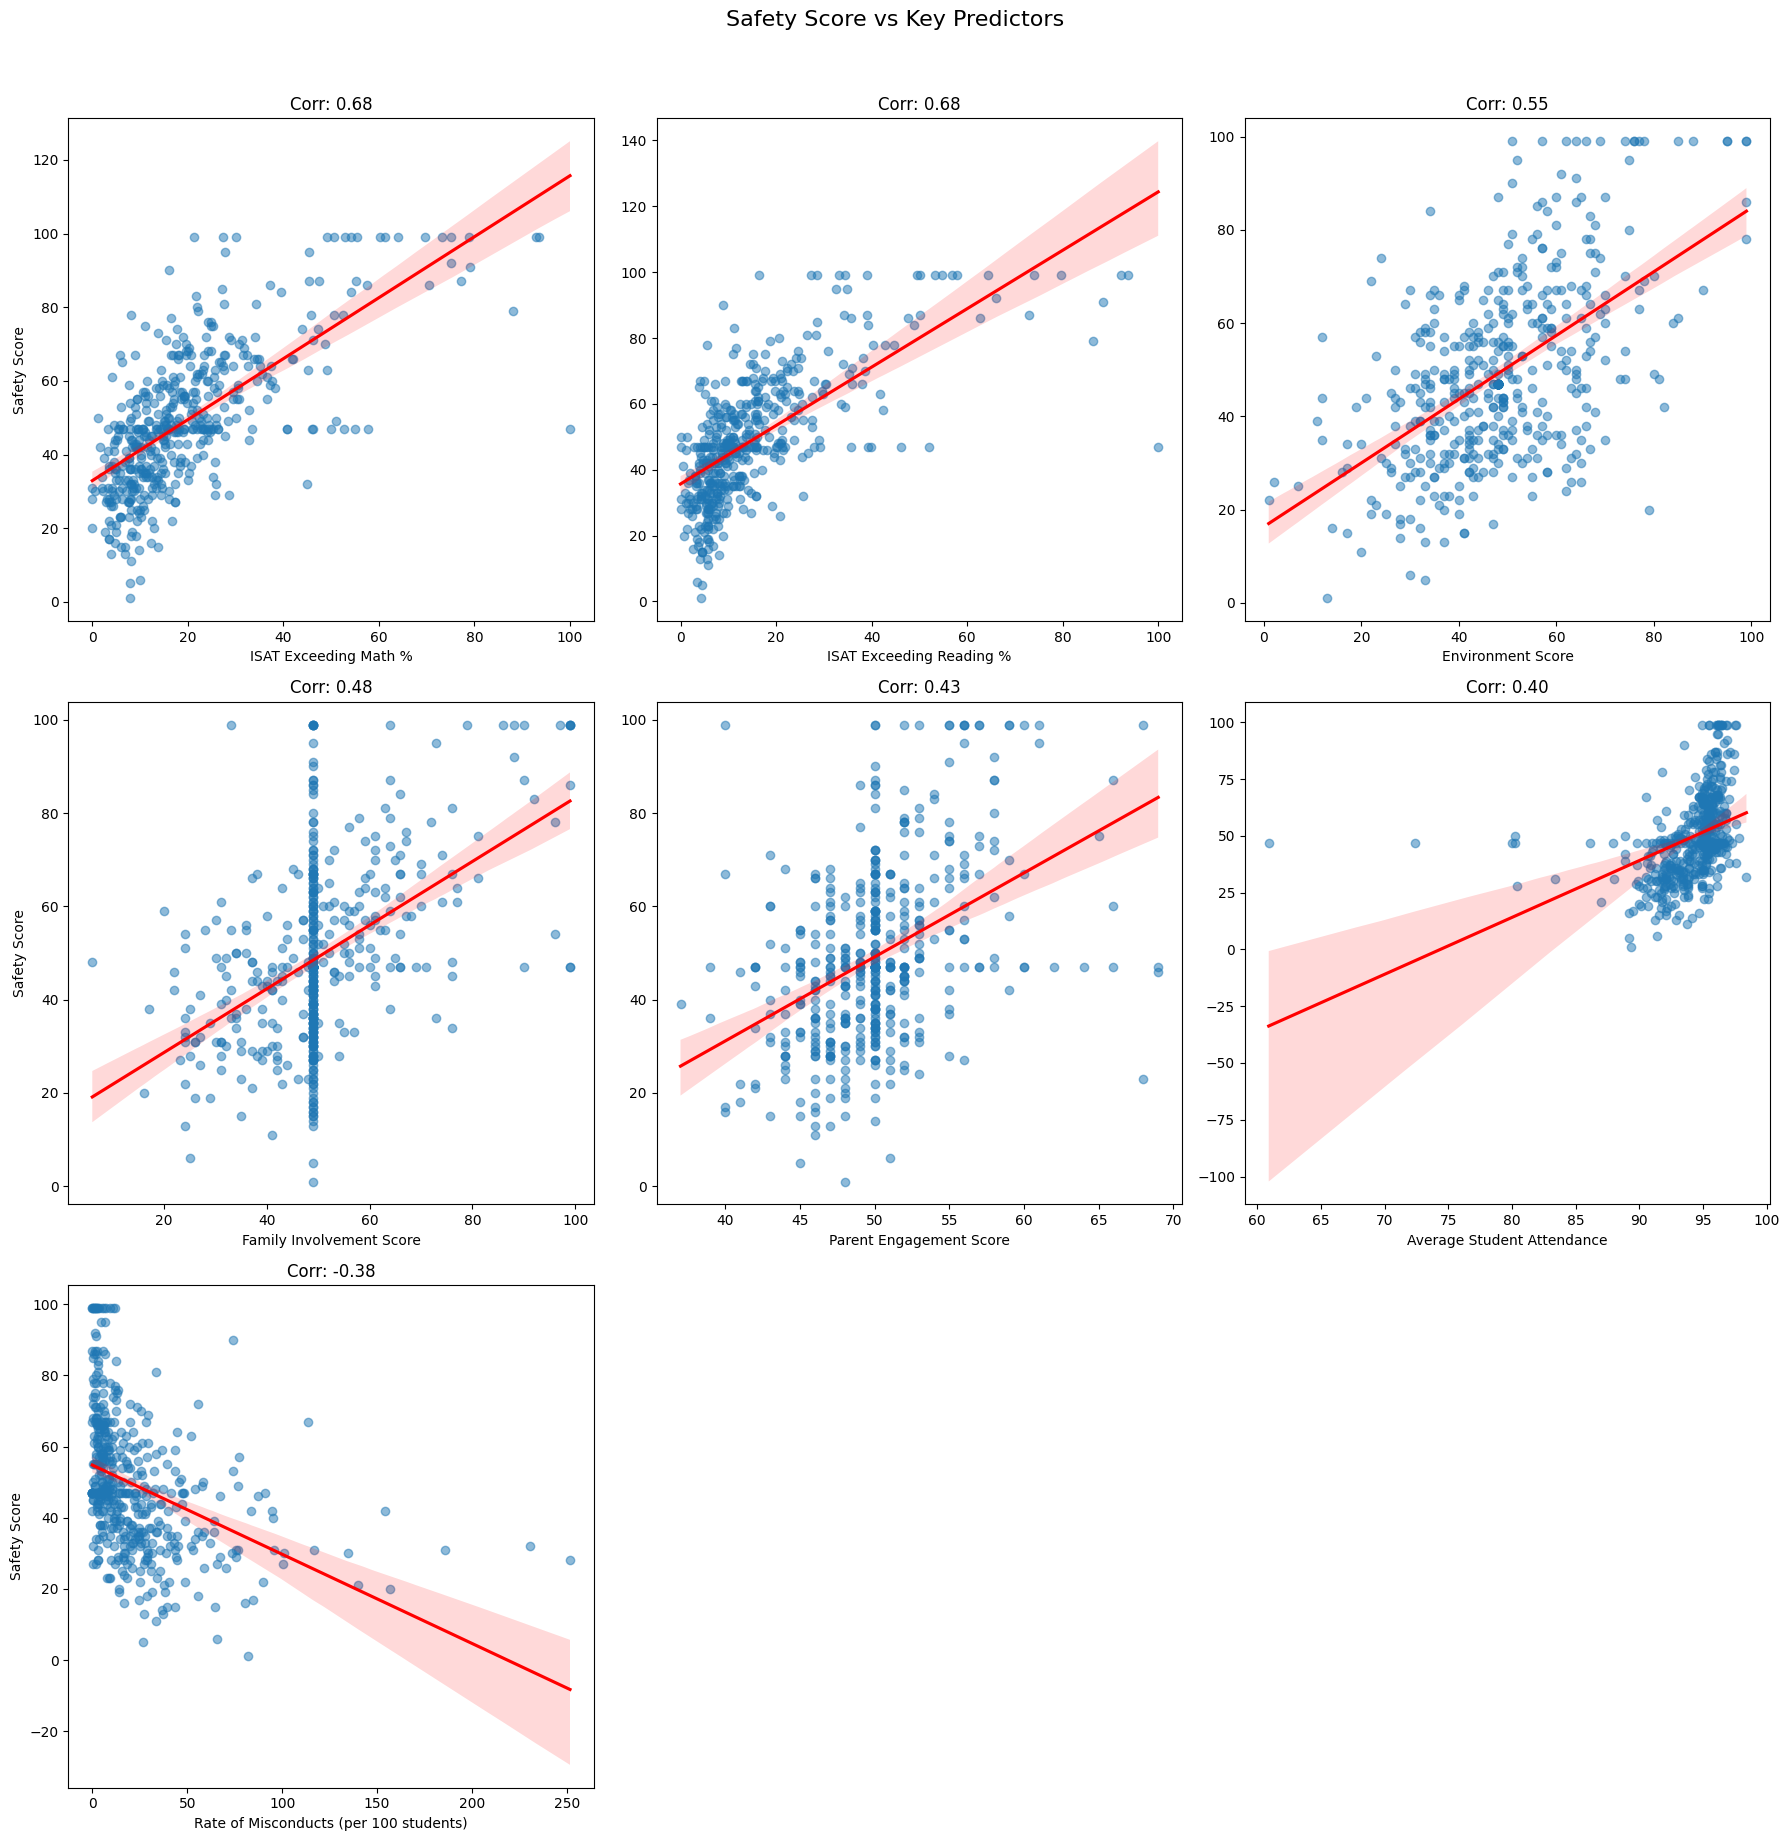

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your data is in a DataFrame called 'df'
predictors = [
    'ISAT Exceeding Math %',
    'ISAT Exceeding Reading %',
    'Environment Score',
    'Family Involvement Score',
    'Parent Engagement Score','Average Student Attendance',
    'Rate of Misconducts (per 100 students)'
]

# Adjust the subplot layout to accommodate all predictors
# Set up the plot grid - changed to 3 rows and 3 columns to accommodate 7 plots.
plt.figure(figsize=(18, 18)) # Increased figure height for better visibility.
plt.suptitle('Safety Score vs Key Predictors', y=1.02, fontsize=16)

for i, predictor in enumerate(predictors, 1):
    # The subplot layout is changed to 3 rows x 3 columns (3, 3, i)
    plt.subplot(3, 3, i) # adjusted layout to 3 rows x 3 columns.
    sns.regplot(
        x=df[predictor],
        y=df['Safety Score'],
        scatter_kws={'alpha':0.5},
        line_kws={'color':'red'}
    )
    plt.title(f'Corr: {df[[predictor, "Safety Score"]].corr().iloc[0,1]:.2f}')
    plt.xlabel(predictor)
    plt.ylabel('Safety Score' if i in [1,4,7] else '') # Adjusted ylabel conditions.
    plt.tight_layout()

plt.savefig('safety_score_relationships.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
categorical_columns = [
    'Safety Icon', 'Family Involvement Icon', 'Environment Icon',
    'Instruction Icon', 'Teachers Icon', 'Parent Engagement Icon',
    'Parent Environment Icon'
]

In [ ]:
import pandas as pd

# Loop through all pairs of categorical variables
for i in range(len(categorical_columns)):
    for j in range(i + 1, len(categorical_columns)):
        var1 = categorical_columns[i]
        var2 = categorical_columns[j]

        # Create cross-tabulation
        cross_tab = pd.crosstab(df[var1], df[var2])

        # Print the cross-tabulation
        print(f"Cross-Tabulation: {var1} vs {var2}")
        print(cross_tab)
        print("\n" + "="*50 + "\n")  # Separator for readability

Cross-Tabulation: Safety Icon vs Family Involvement Icon
Family Involvement Icon  1   2   3   4   5  unknown
Safety Icon                                        
1                        0   5   2   0   0       12
2                        2  35  23   3   0       71
3                        1  25  48  16   1       61
4                        0   3  19  25   3       37
5                        0   1   0   7  12       16
unknown                  0   1   5   6   3       30


Cross-Tabulation: Safety Icon vs Environment Icon
Environment Icon  1   2   3   4  5  unknown
Safety Icon                                
1                 3  12   4   0  0        0
2                 8  52  58  16  0        0
3                 3  43  80  23  3        0
4                 0   9  46  27  5        0
5                 0   1   8  20  7        0
unknown           0   0   0   0  0       45


Cross-Tabulation: Safety Icon vs Instruction Icon
Instruction Icon  1   2   3   4  5  unknown
Safety Icon                

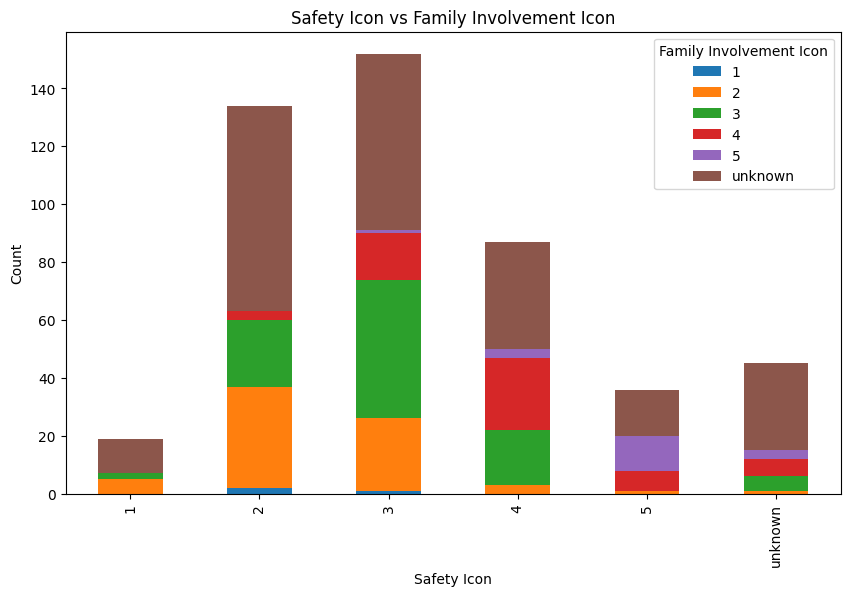

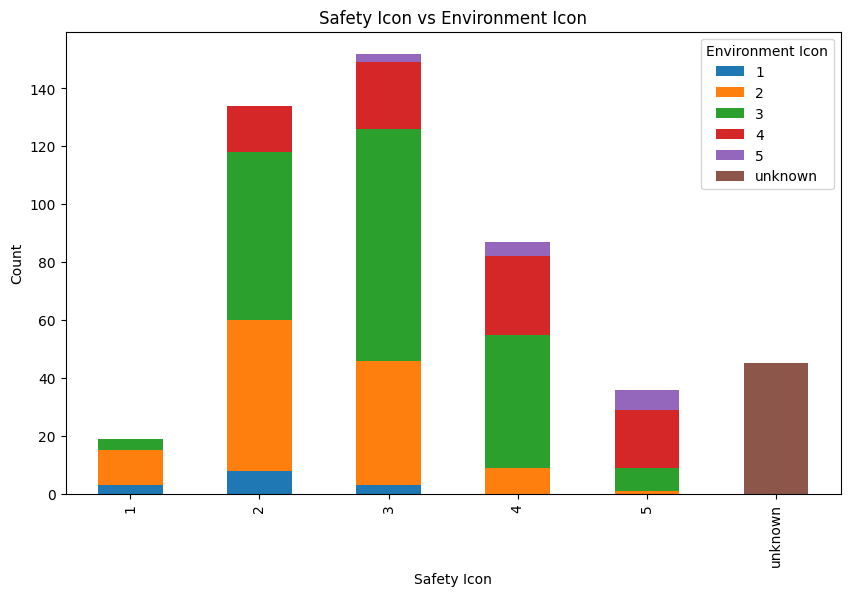

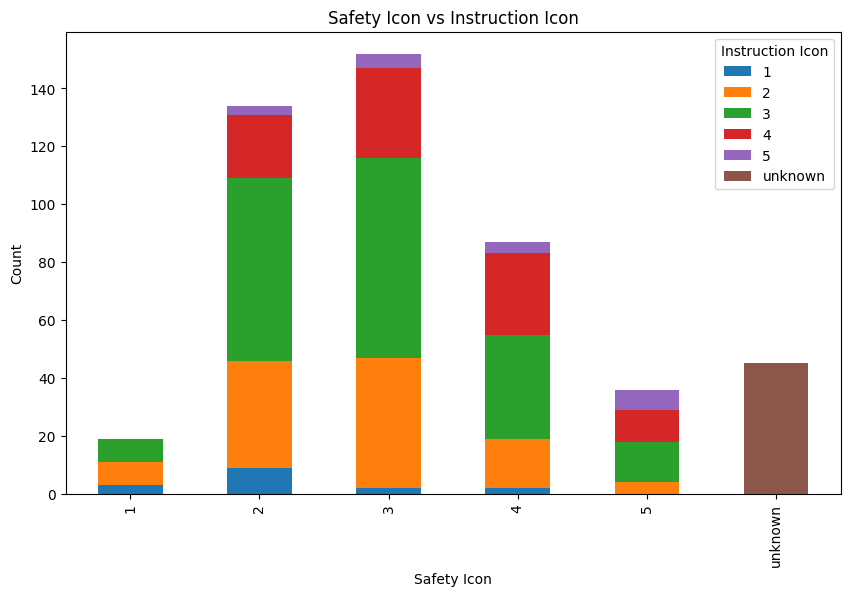

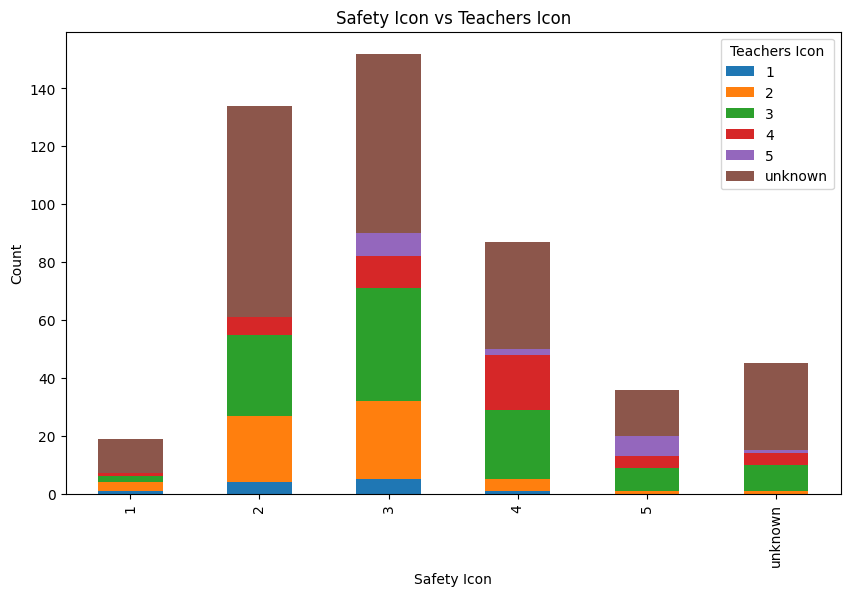

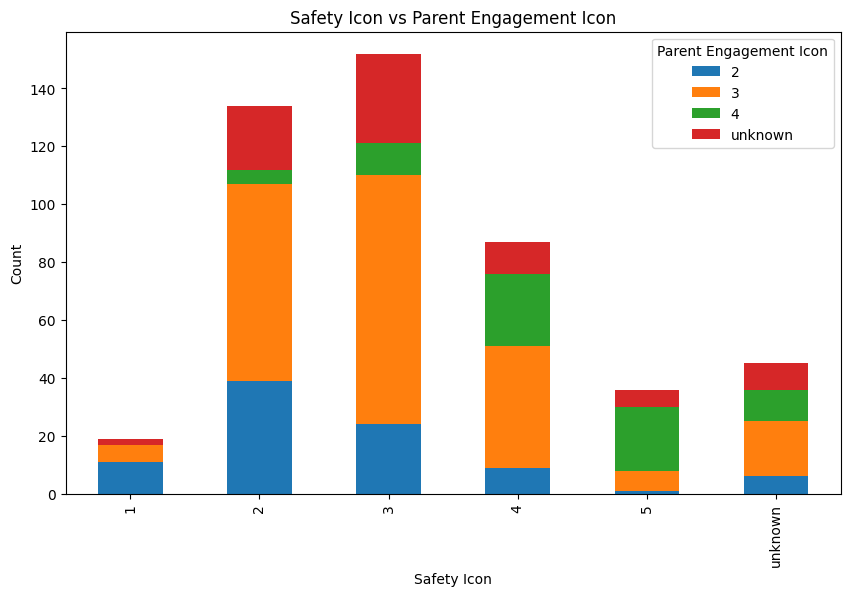

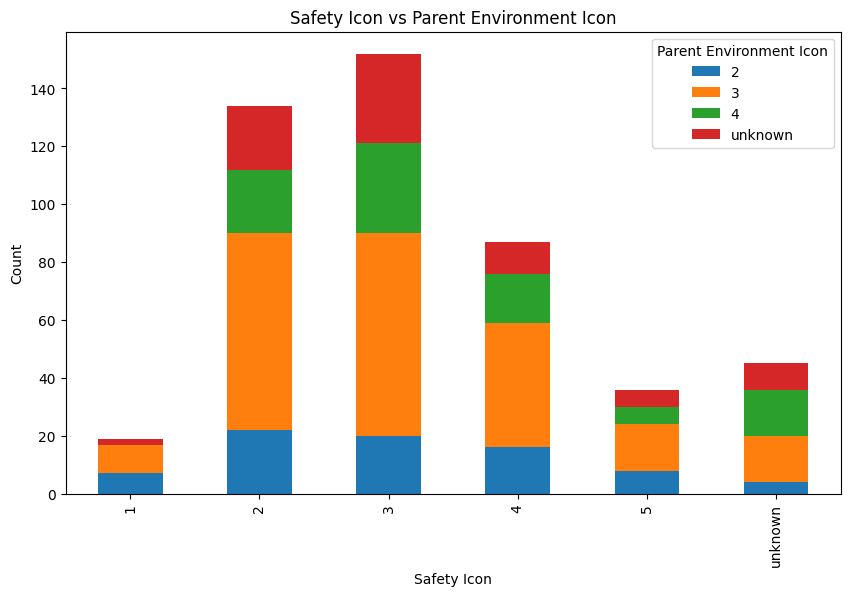

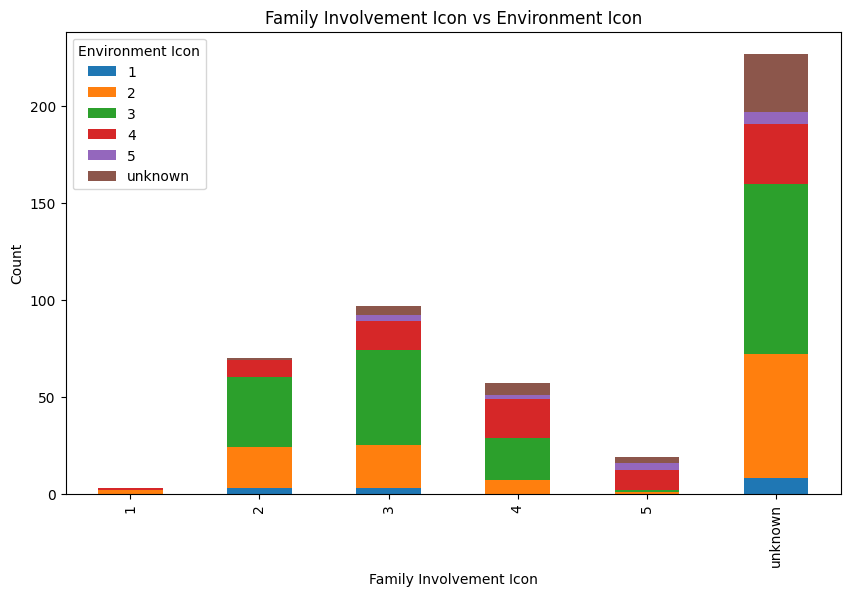

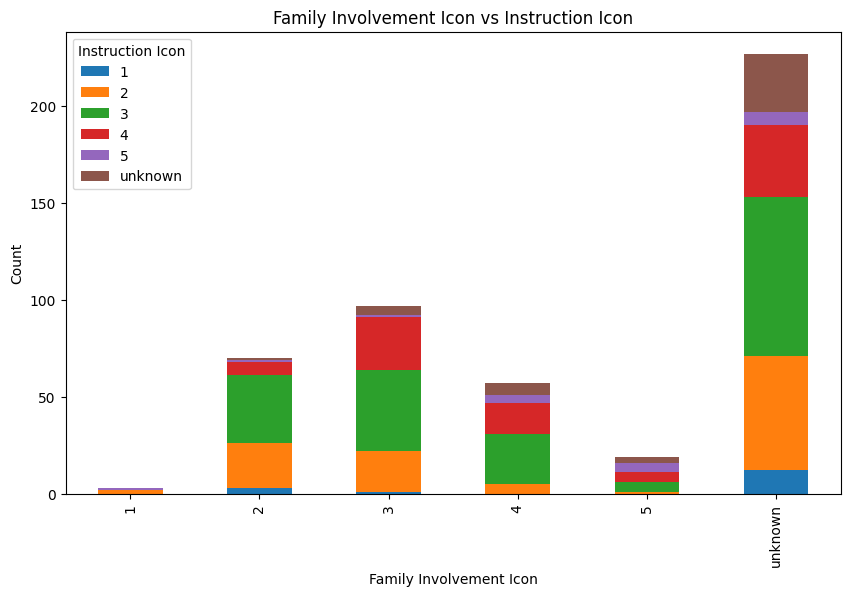

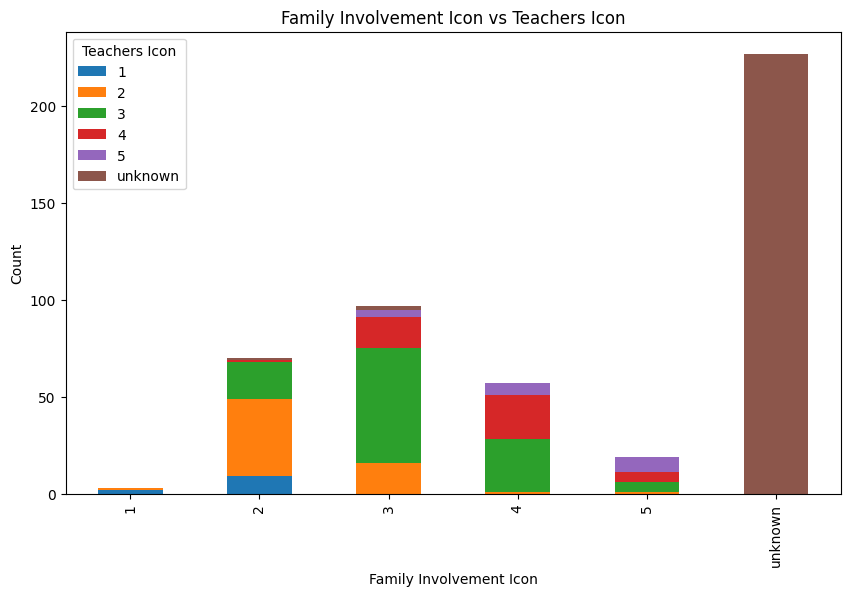

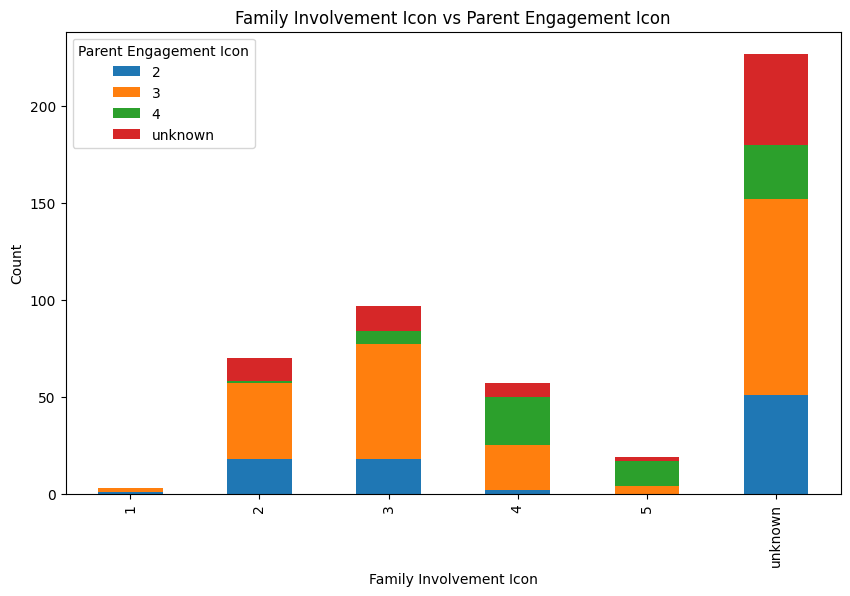

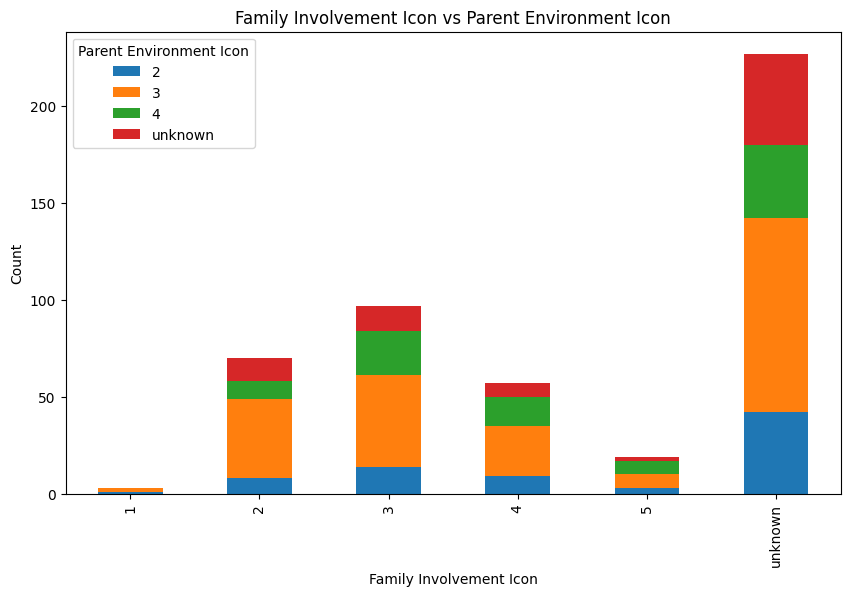

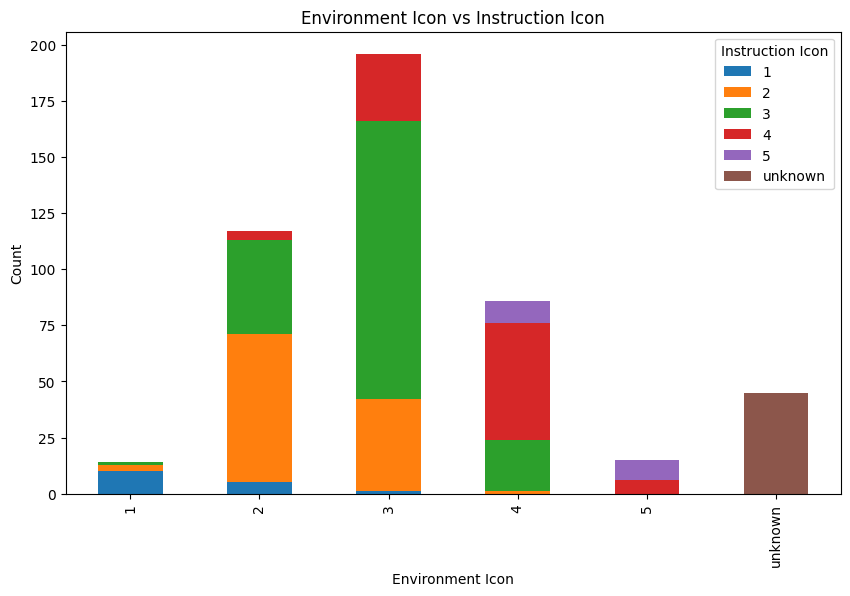

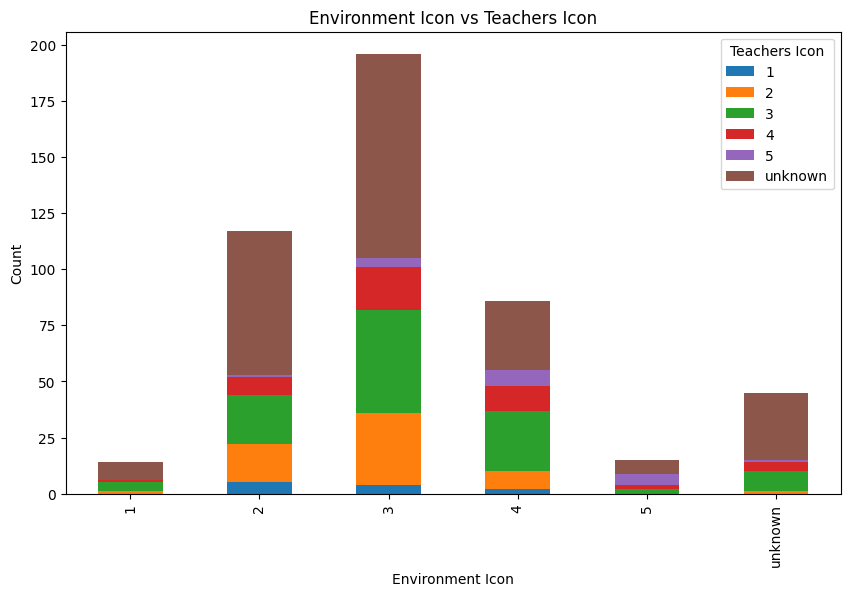

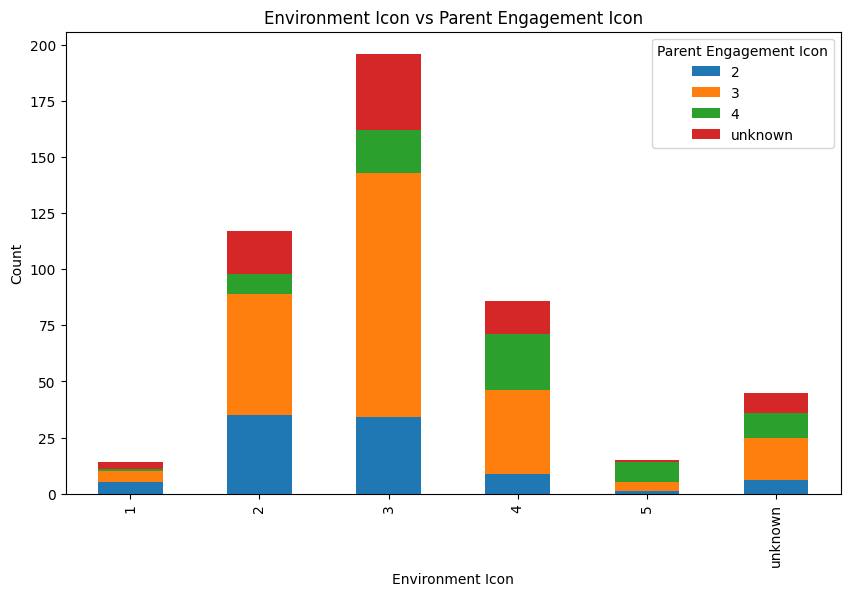

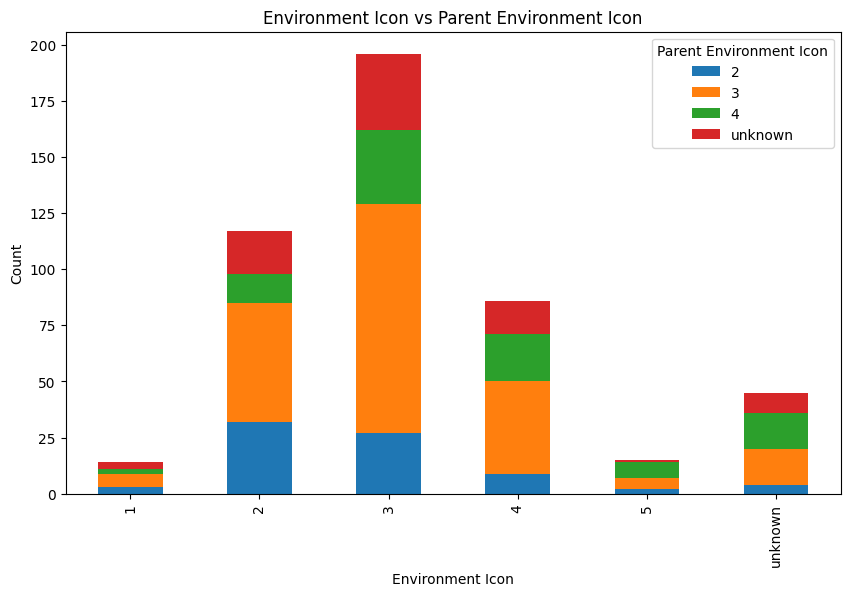

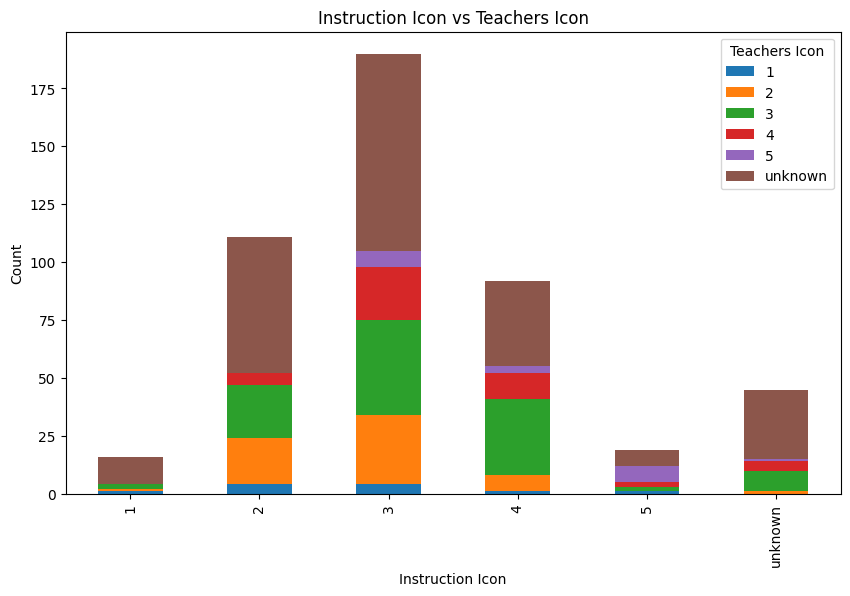

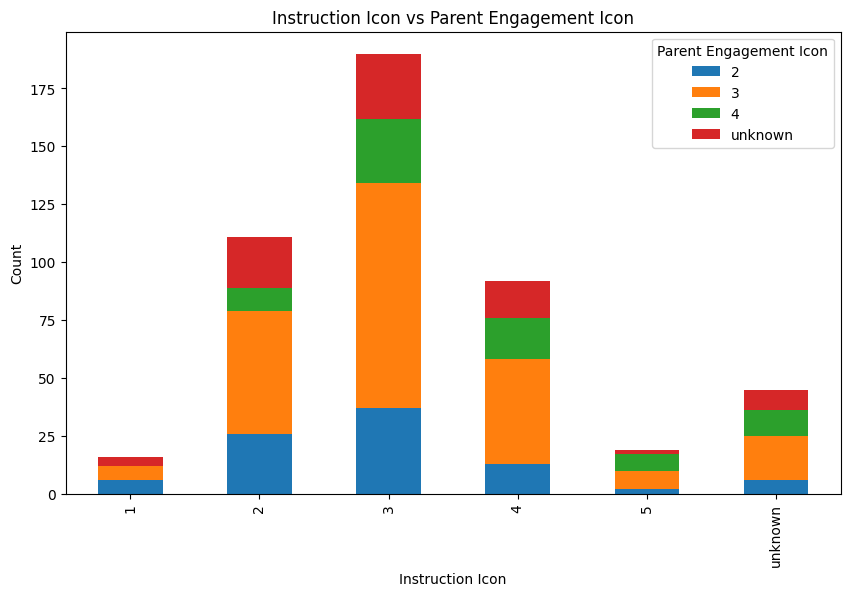

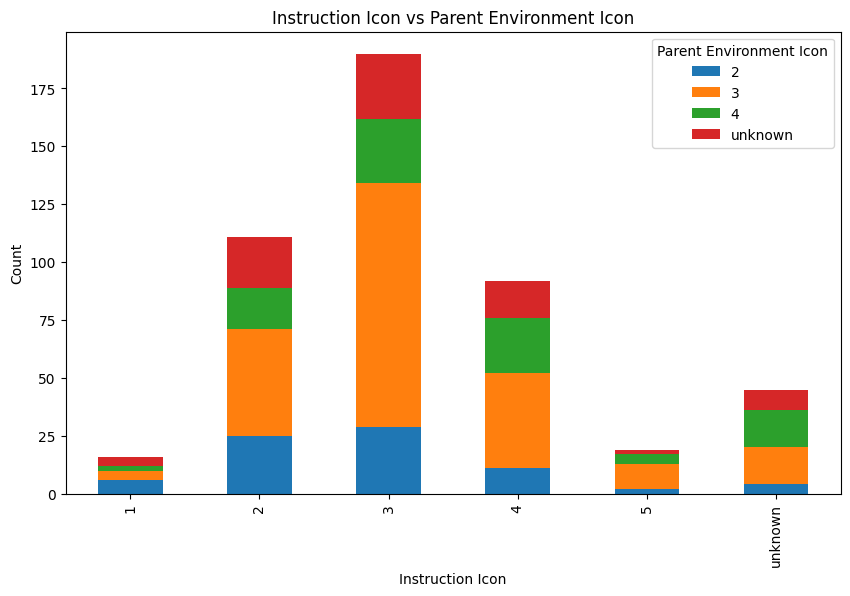

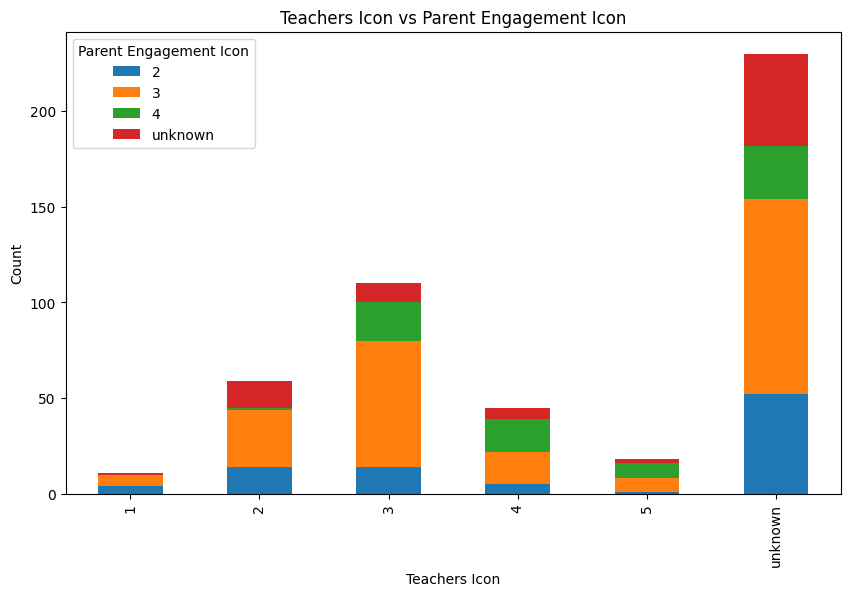

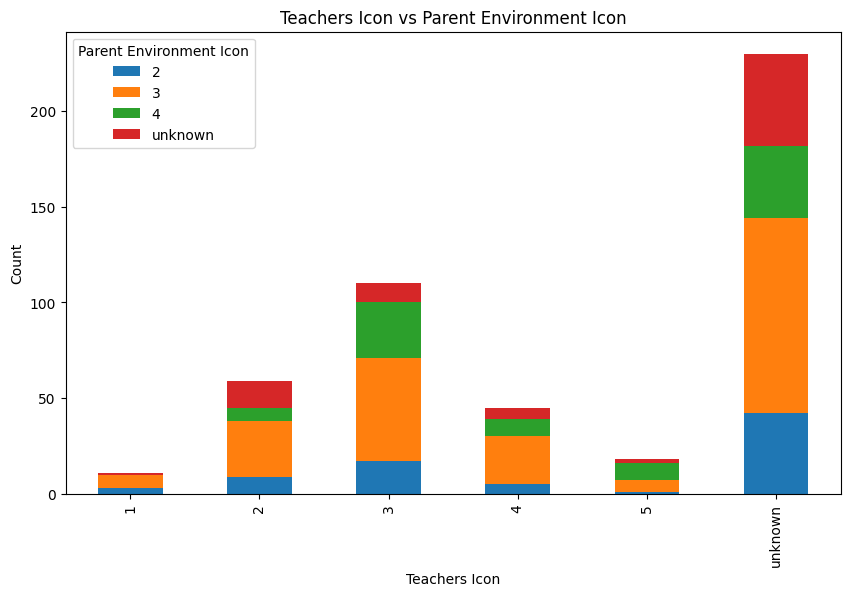

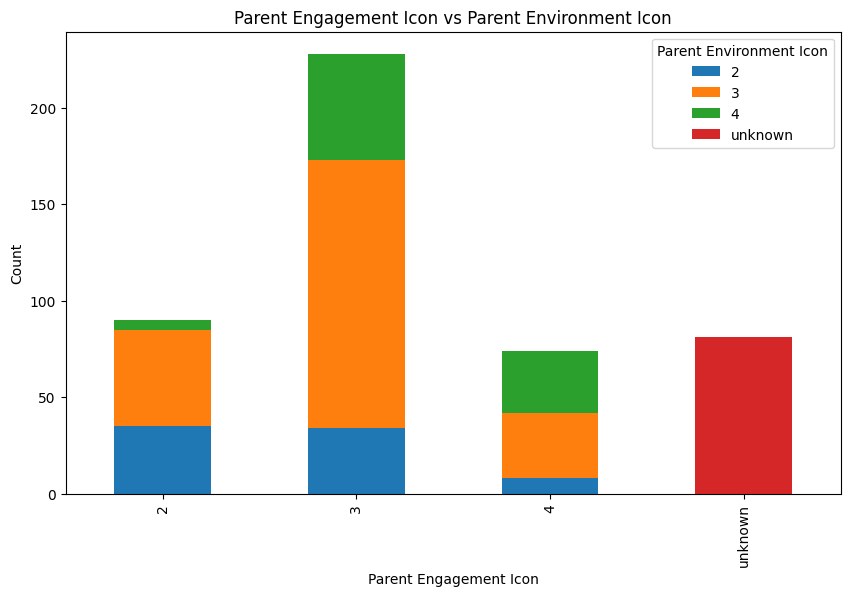

In [ ]:
import matplotlib.pyplot as plt

# Loop through all pairs of categorical variables
for i in range(len(categorical_columns)):
    for j in range(i + 1, len(categorical_columns)):
        var1 = categorical_columns[i]
        var2 = categorical_columns[j]

        # Create cross-tabulation
        cross_tab = pd.crosstab(df[var1], df[var2])

        # Plot stacked bar chart
        cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.title(f"{var1} vs {var2}")
        plt.xlabel(var1)
        plt.ylabel("Count")
        plt.legend(title=var2)
        plt.show()

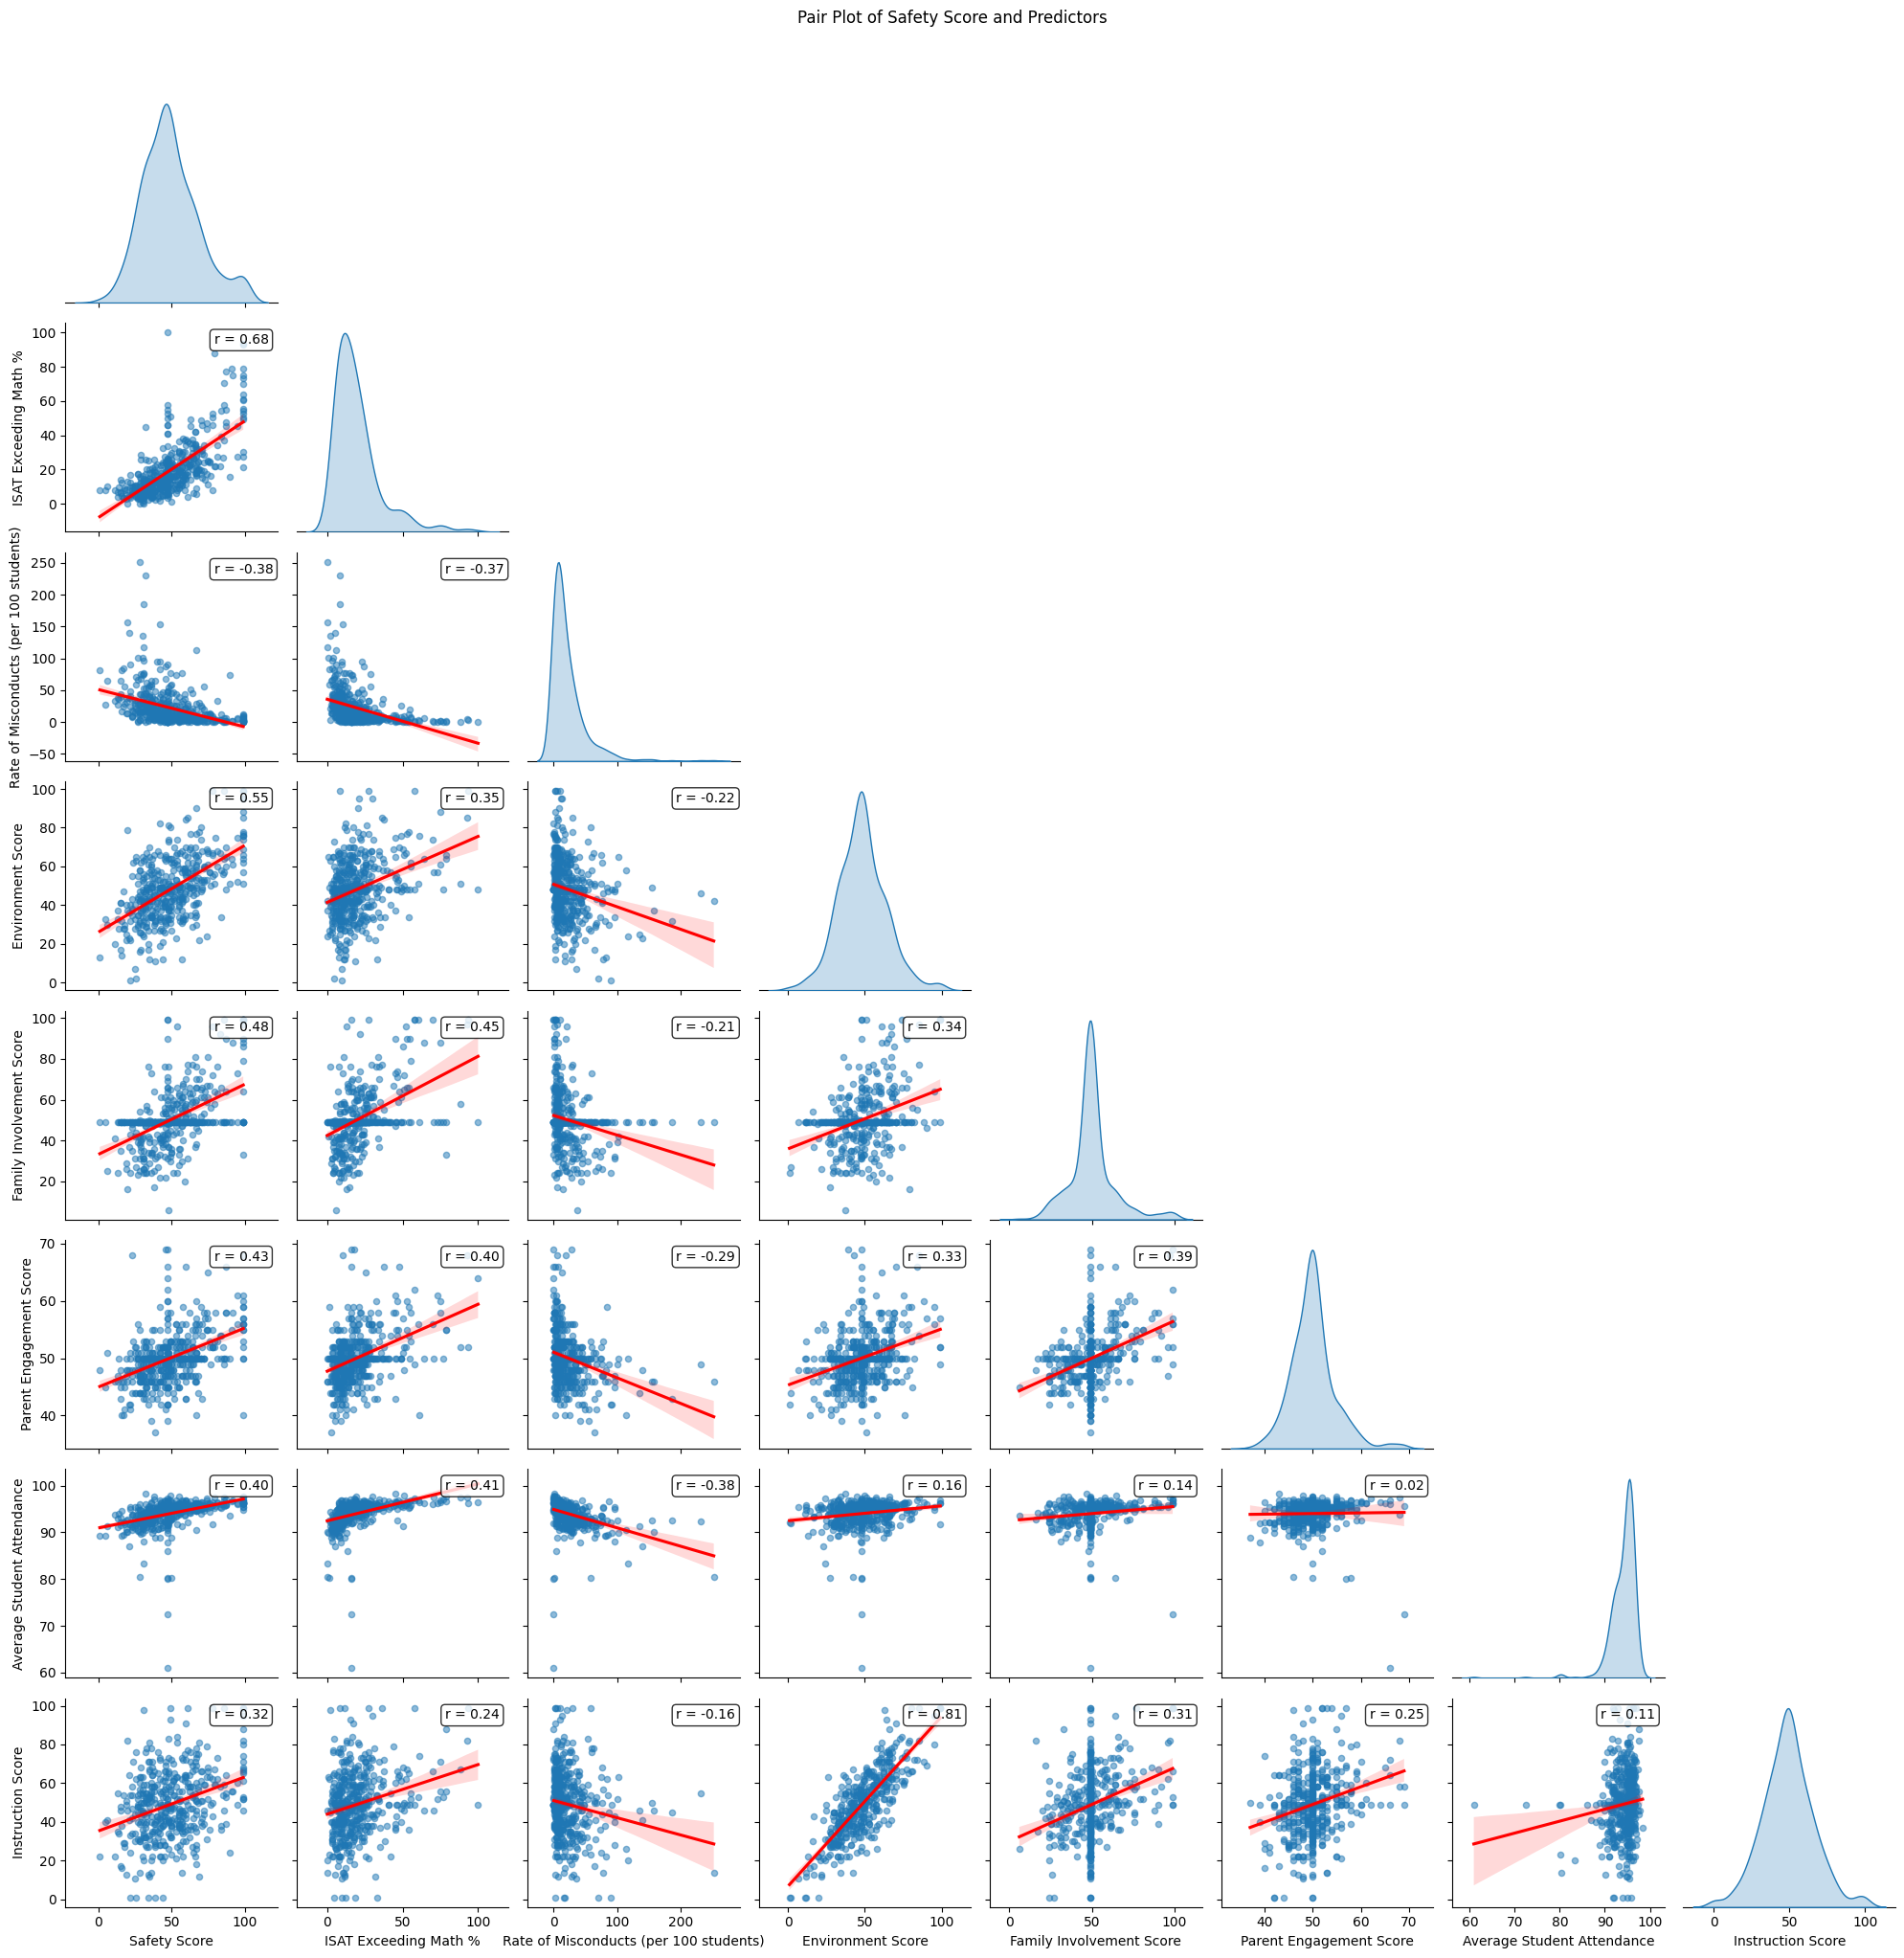

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the variables you want to include
variables = [
    'Safety Score',  # Your dependent variable
    'ISAT Exceeding Math %',
    'Rate of Misconducts (per 100 students)',
    'Environment Score',
    'Family Involvement Score',
    'Parent Engagement Score','Average Student Attendance',
    'Instruction Score'
]

# Create the pair plot
pair_plot = sns.pairplot(
    data=df[variables],
    kind='reg',  # Adds regression lines
    diag_kind='kde',  # Density plots on diagonal
    plot_kws={
        'scatter_kws': {'alpha': 0.5, 's': 20},  # Point transparency and size
        'line_kws': {'color': 'red'}  # Regression line color
    },
    corner=True  # Shows only lower half (no duplicates)
)

# Add correlation coefficients to each plot
for i, row in enumerate(pair_plot.axes):
    for j, ax in enumerate(row):
        if i > j:  # Only label lower triangle
            x_var = variables[j]
            y_var = variables[i]
            corr = df[[x_var, y_var]].corr().iloc[0,1]
            ax.annotate(f"r = {corr:.2f}",
                        xy=(0.7, 0.9),
                        xycoords=ax.transAxes,
                        fontsize=10,
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Adjust layout and save
plt.suptitle('Pair Plot of Safety Score and Predictors', y=1.02)
plt.tight_layout()
plt.savefig('safety_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

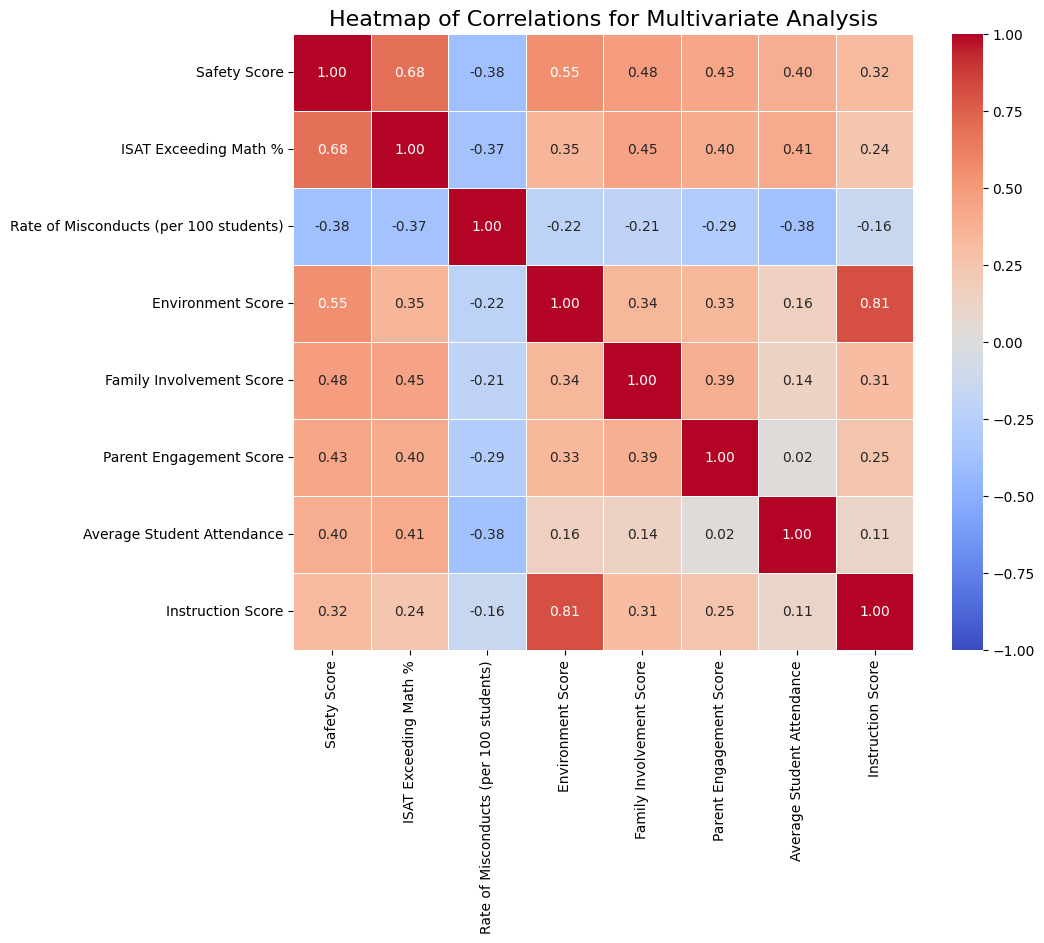

In [ ]:
# Compute the correlation matrix
correlation_matrix = df[variables].corr()  # Use 'variables' instead of 'pair_plot_vars'

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,  # Annotate the heatmap with correlation values
    fmt=".2f",   # Format the annotations to 2 decimal places
    cmap="coolwarm",  # Use a cool-to-warm color scale
    vmin=-1, vmax=1,  # Set the range of the color scale
    linewidths=0.5    # Add lines between cells
)

# Add a title
plt.title("Heatmap of Correlations for Multivariate Analysis", fontsize=16)
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Create the 3D scatter plot
fig = px.scatter_3d(
    df,
    x='ISAT Exceeding Math %',  # Most correlated (0.68)
    y='Environment Score',      # Second most correlated (0.55)
    z='Family Involvement Score',  # Third most correlated (0.48)
    color='Safety Score',       # Color by target variable
    title='3D Relationship: Safety Score vs Top Predictors',
    labels={
        'ISAT Exceeding Math %': 'ISAT Math %',
        'Environment Score': 'Environment',
        'Family Involvement Score': 'Family Involvement'
    },
    hover_name=df.index,  # Show school ID on hover
    hover_data=['Rate of Misconducts (per 100 students)'],  # Additional info
    color_continuous_scale=px.colors.sequential.Viridis,
    height=800,
    width=1000
)

# Customize layout
fig.update_layout(
    scene=dict(
        xaxis_title='ISAT Math % (r=0.68)',
        yaxis_title='Environment Score (r=0.55)',
        zaxis_title='Family Involvement (r=0.48)',
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=0.8)  # Adjust viewing angle
        )
    ),
    coloraxis_colorbar=dict(
        title='Safety Score',
        thickness=20,
        len=0.75
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Add correlation annotations
annotations = [
    dict(
        x=0.1, y=0.05,
        xref='paper', yref='paper',
        text=f"Total Schools: {len(df)}<br>Mouse over points for details<br>Drag to rotate view",
        showarrow=False,
        font=dict(size=12)
    )
]
fig.update_layout(annotations=annotations)

# Save and show
fig.write_html("3d_safety_plot.html")  # Interactive HTML
fig.show()  # Displays in notebook/browser

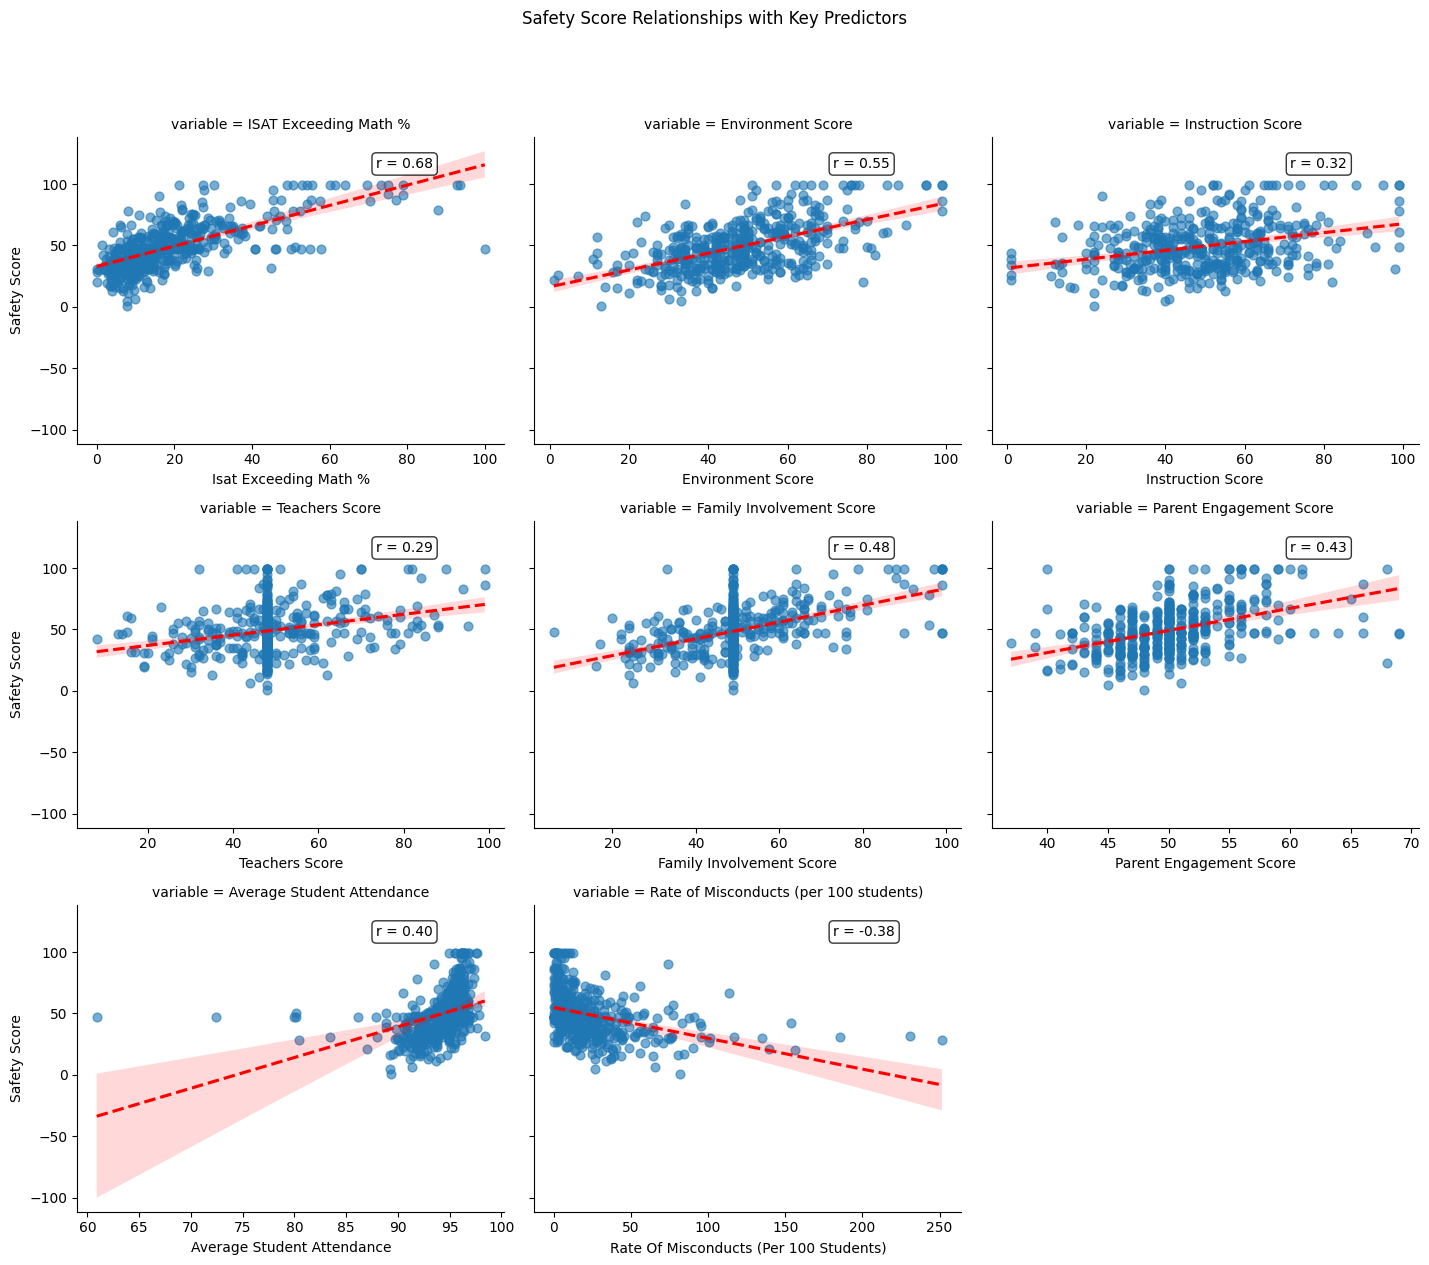

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the facet grid
g = sns.FacetGrid(
    data=df.melt(id_vars=['Safety Score'],
                value_vars=[
                    'ISAT Exceeding Math %',
                    'Environment Score','Instruction Score',
                    'Teachers Score',
                    'Environment Score',
                    'Family Involvement Score',
                    'Parent Engagement Score','Average Student Attendance',
                    'Rate of Misconducts (per 100 students)'
                ]),
    col='variable',
    col_wrap=3,  # 3 plots per row
    height=4,
    aspect=1.2,
    sharex=False,
    sharey=True  # Same y-axis for all plots
)

# Map scatterplots to each facet
g.map_dataframe(
    sns.regplot,
    x='value',
    y='Safety Score',
    scatter_kws={'alpha': 0.6, 's': 40},
    line_kws={'color': 'red', 'linestyle': '--'}
)

# Add correlation coefficients
for ax, var in zip(g.axes.flat, g.col_names):
    corr = df['Safety Score'].corr(df[var])
    ax.annotate(
        f'r = {corr:.2f}',
        xy=(0.7, 0.9),
        xycoords='axes fraction',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
    )
    ax.set_xlabel(var.replace('_', ' ').title())

# Adjust layout
g.set_axis_labels(y_var='Safety Score')
g.fig.suptitle('Safety Score Relationships with Key Predictors', y=1.05)
plt.tight_layout()

# Save and show
plt.savefig('faceted_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
categorical_columns = [
    'Safety Icon', 'Family Involvement Icon', 'Environment Icon',
    'Instruction Icon', 'Teachers Icon', 'Parent Engagement Icon',
    'Parent Environment Icon'
]

In [ ]:
# Count unique values in each categorical column
for col in categorical_columns:
    unique_values = df[col].nunique()
    print(f"{col}: {unique_values} unique values")

Safety Icon: 6 unique values
Family Involvement Icon: 6 unique values
Environment Icon: 6 unique values
Instruction Icon: 6 unique values
Teachers Icon: 6 unique values
Parent Engagement Icon: 4 unique values
Parent Environment Icon: 4 unique values


In [ ]:
# prompt: give label encoding

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoders = {}

# Iterate through categorical columns and apply label encoding
for column in categorical_columns:
    # Convert the column to string type before encoding
    df[column] = df[column].astype(str)
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store the encoder for later use

# Now you can use the label_encoders to transform new data or reverse the encoding.
# Example:
# new_value = label_encoders['Safety Icon'].transform(['Very Strong'])

print(df.head())

   Safety Icon  Safety Score  Family Involvement Icon  \
2            2          40.0                        5   
3            2          54.0                        2   
4            3          70.0                        3   
5            2          42.0                        5   
6            1          35.0                        5   

   Family Involvement Score  Environment Icon  Environment Score  \
2                      49.0                 2               41.0   
3                      58.0                 1               37.0   
4                      65.0                 2               53.0   
5                      49.0                 2               49.0   
6                      49.0                 2               51.0   

   Instruction Icon  Instruction Score  Teachers Icon  Teachers Score  ...  \
2                 2               43.0              5            48.0  ...   
3                 2               41.0              4            88.0  ...   
4             

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select numerical variables to scale
numerical_columns = [
    'Safety Score', 'Family Involvement Score', 'Environment Score',
    'Instruction Score', 'Teachers Score', 'Parent Engagement Score',
    'Parent Environment Score', 'Average Student Attendance',
    'Rate of Misconducts (per 100 students)', 'Average Teacher Attendance',
    'Individualized Education Program Compliance Rate',
    'ISAT Exceeding Math %', 'ISAT Exceeding Reading %',
    'ISAT Value Add Math', 'ISAT Value Add Read'
]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled = df.copy()
df_scaled[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the first few rows of the scaled dataset
print(df_scaled.head())

   Safety Icon  Safety Score  Family Involvement Icon  \
2            2     -0.481089                        5   
3            2      0.247420                        2   
4            3      1.080002                        3   
5            2     -0.377016                        5   
6            1     -0.741271                        5   

   Family Involvement Score  Environment Icon  Environment Score  \
2                 -0.082035                 2          -0.459756   
3                  0.578120                 1          -0.716730   
4                  1.091573                 2           0.311167   
5                 -0.082035                 2           0.054193   
6                 -0.082035                 2           0.182680   

   Instruction Icon  Instruction Score  Teachers Icon  Teachers Score  ...  \
2                 2          -0.359609              5       -0.078215  ...   
3                 2          -0.478101              4        2.979268  ...   
4             

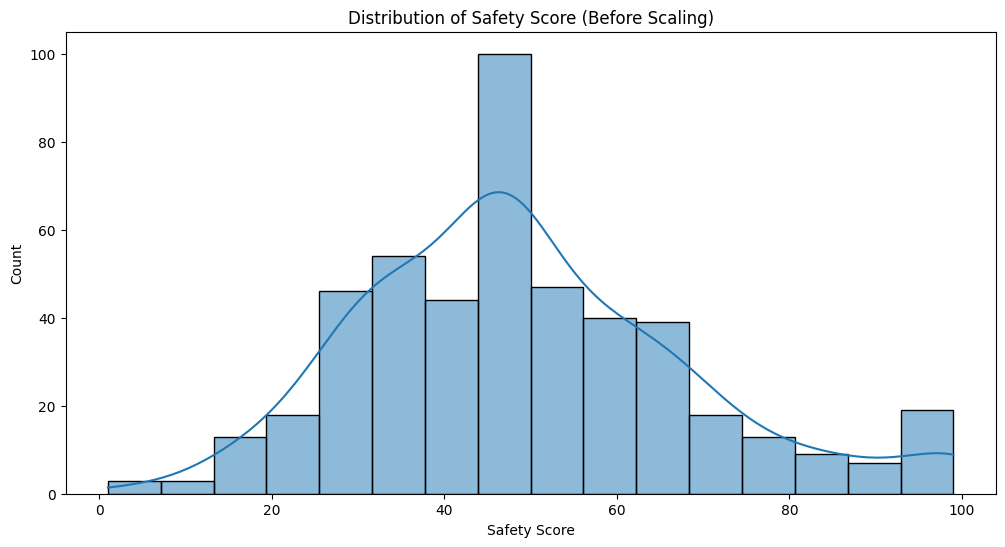

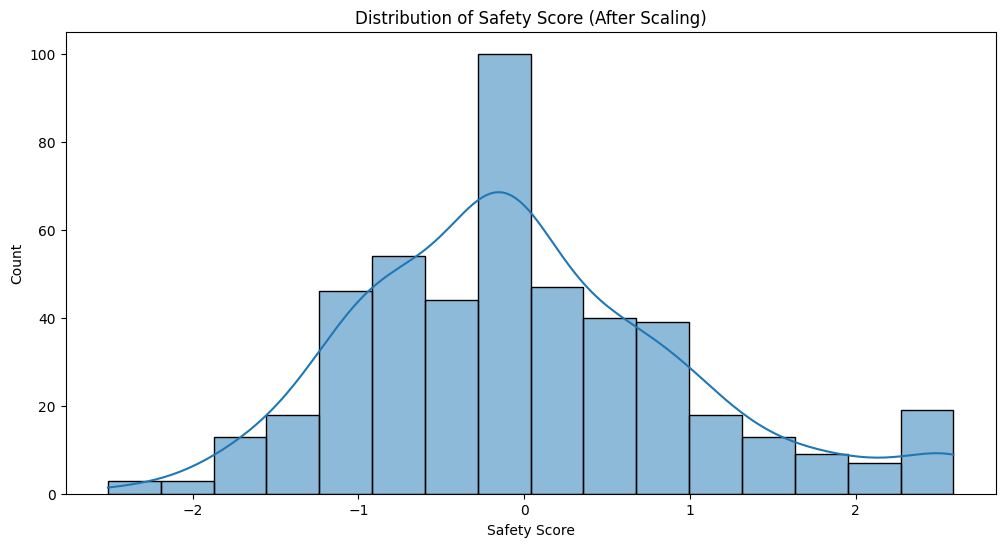

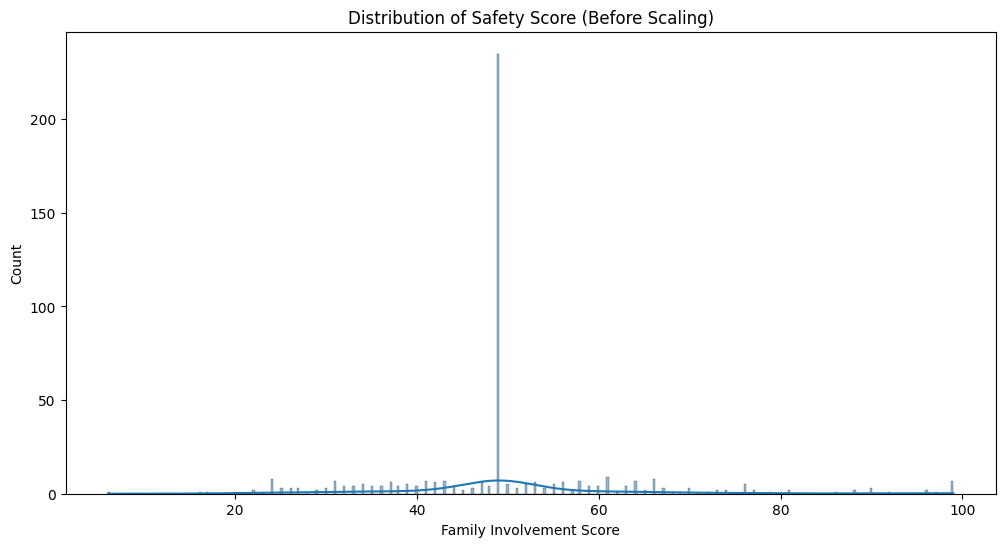

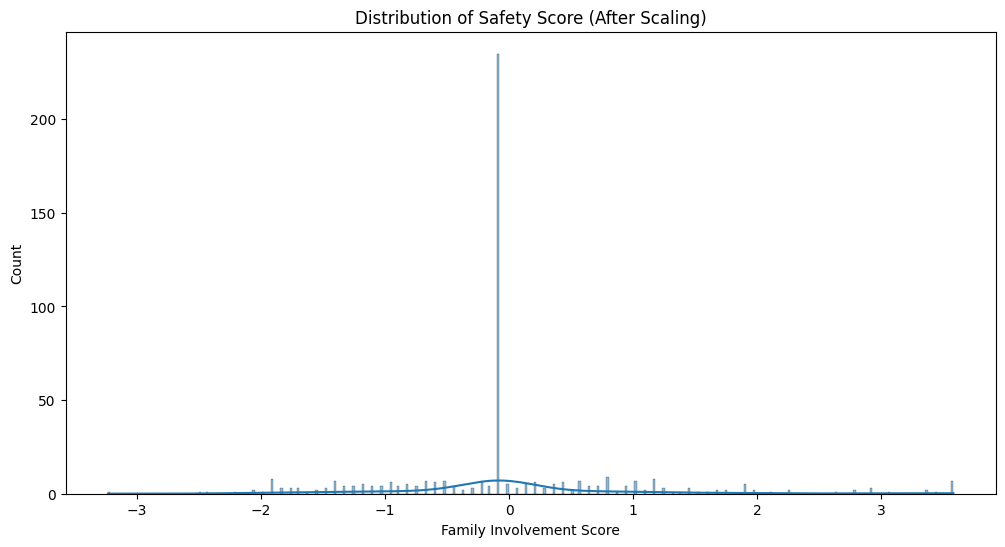

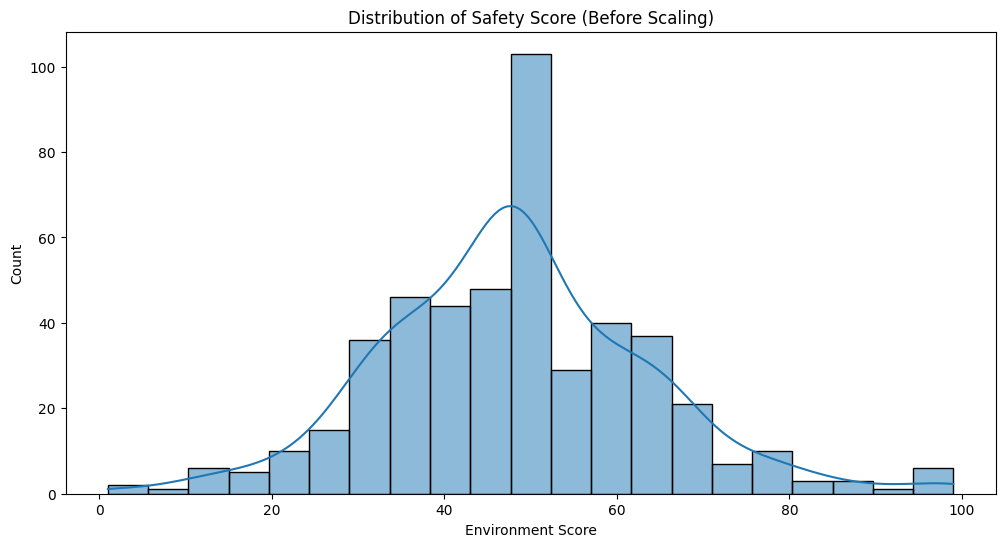

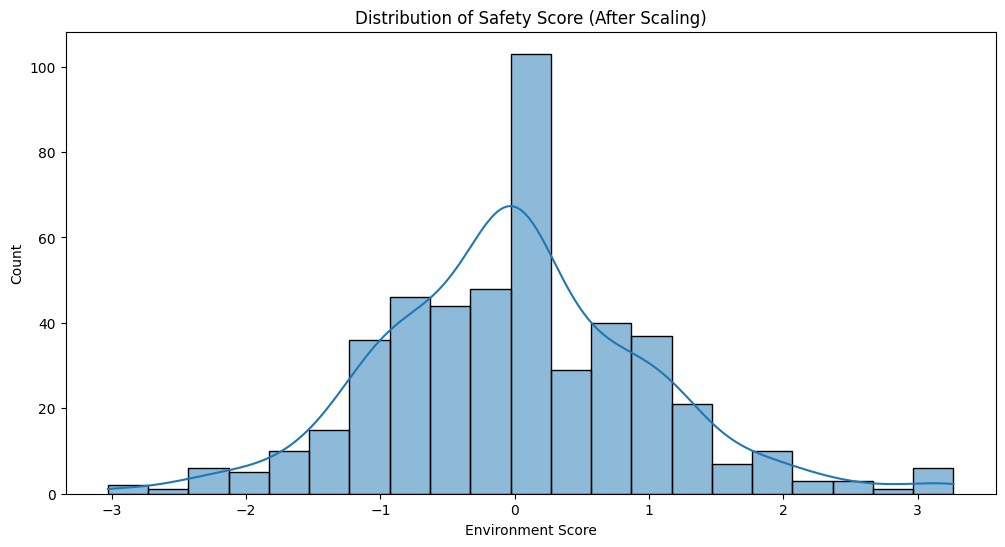

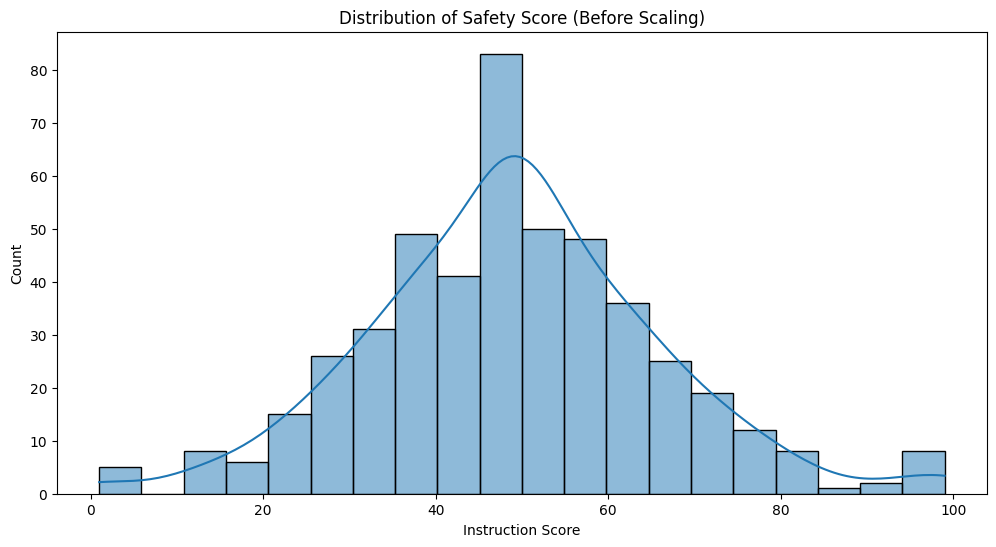

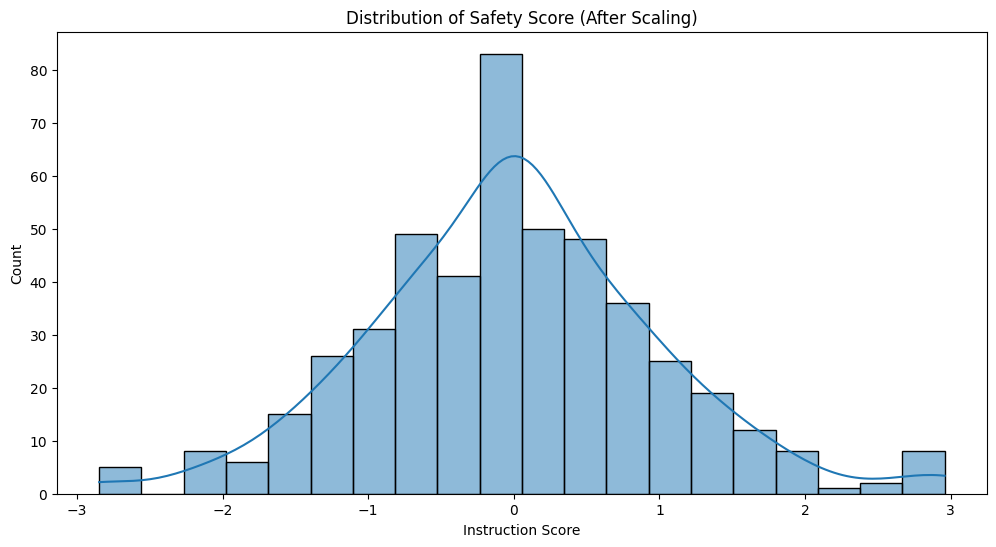

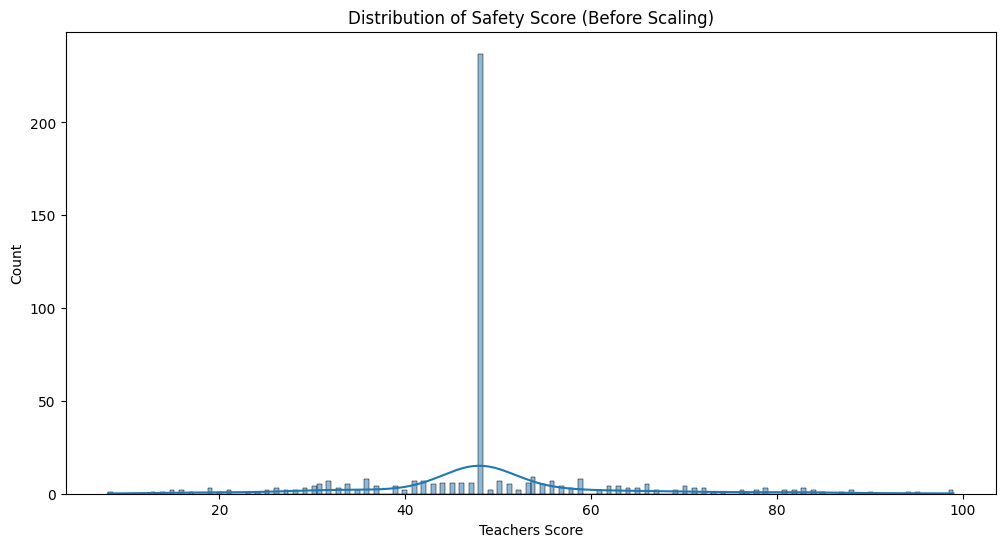

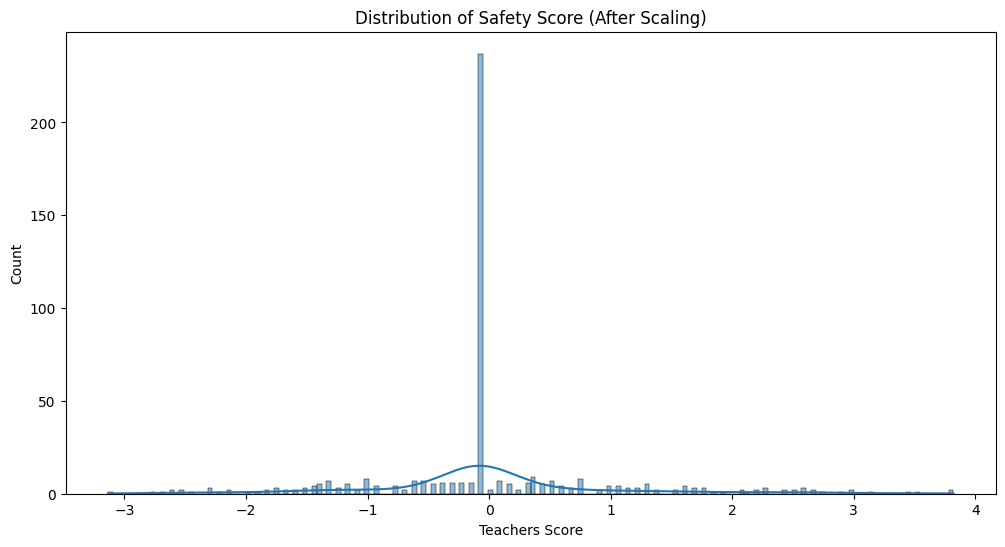

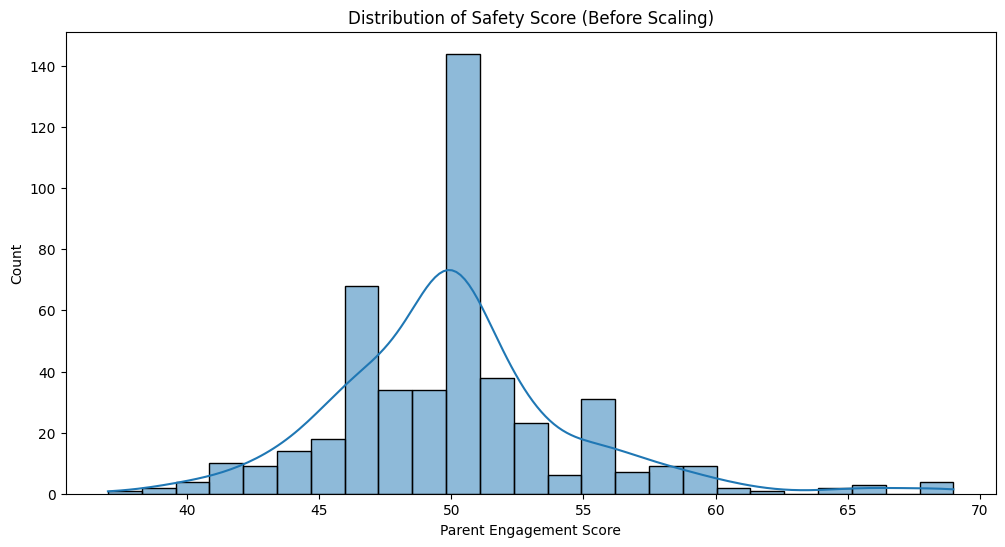

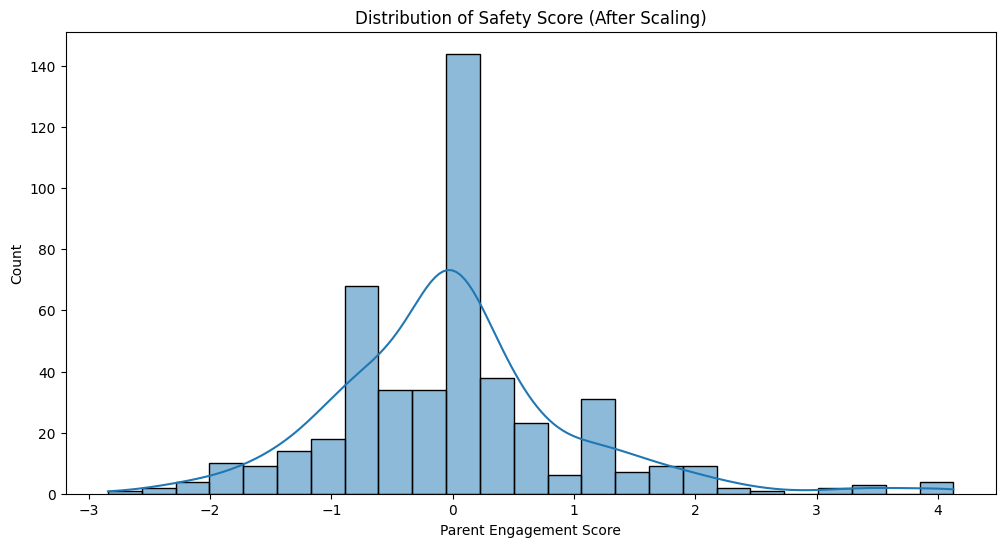

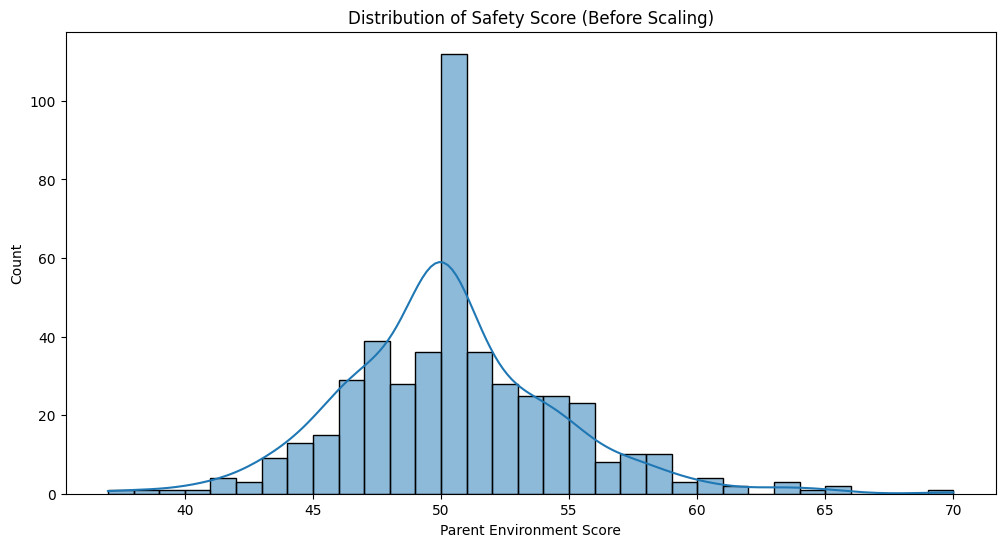

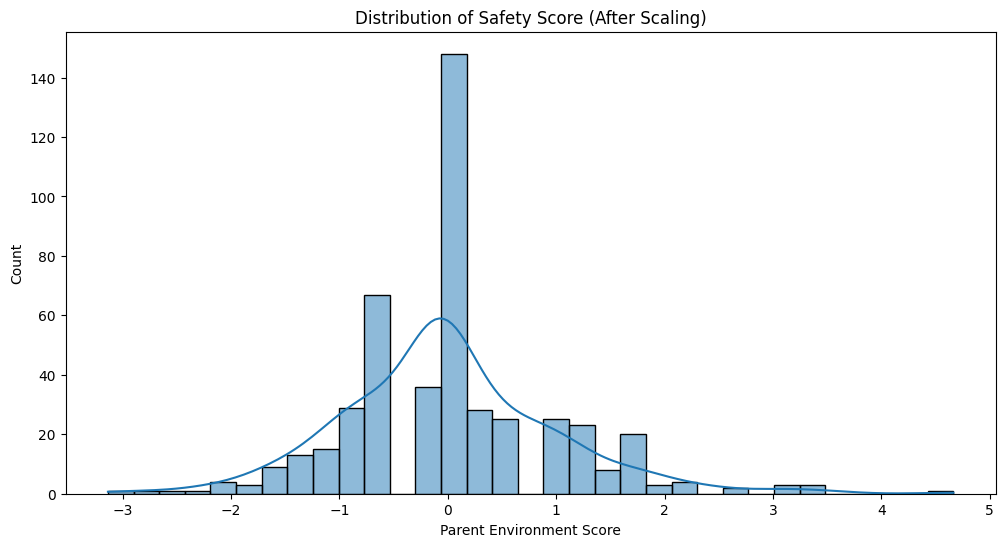

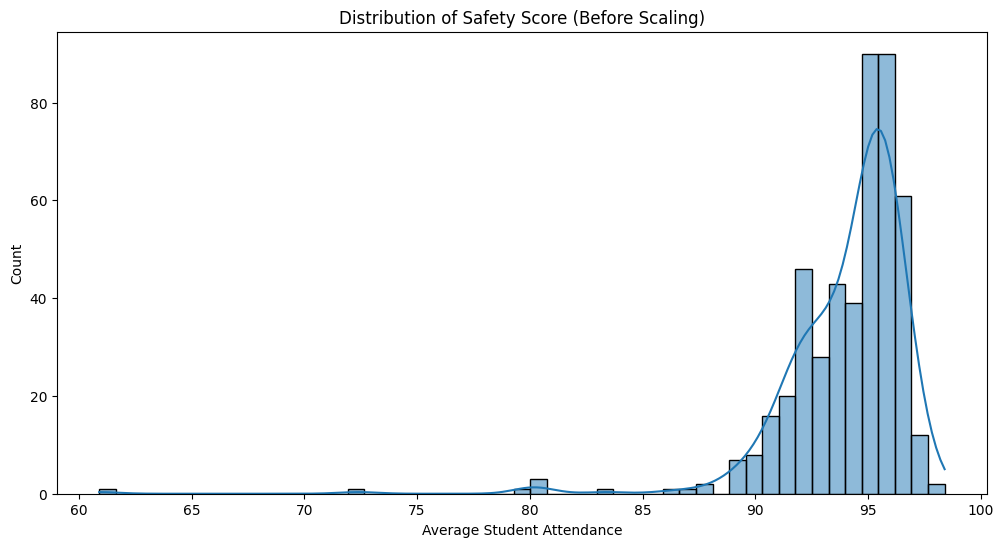

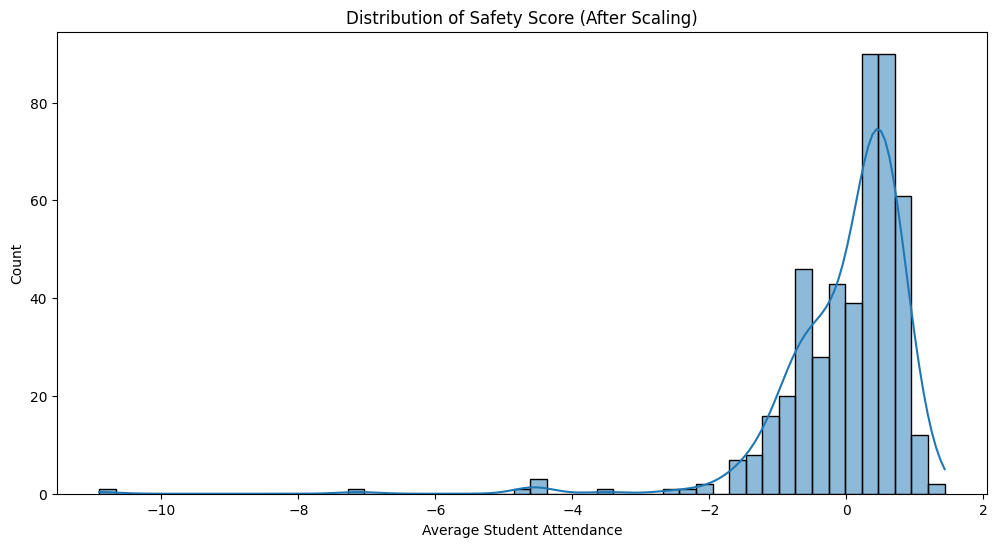

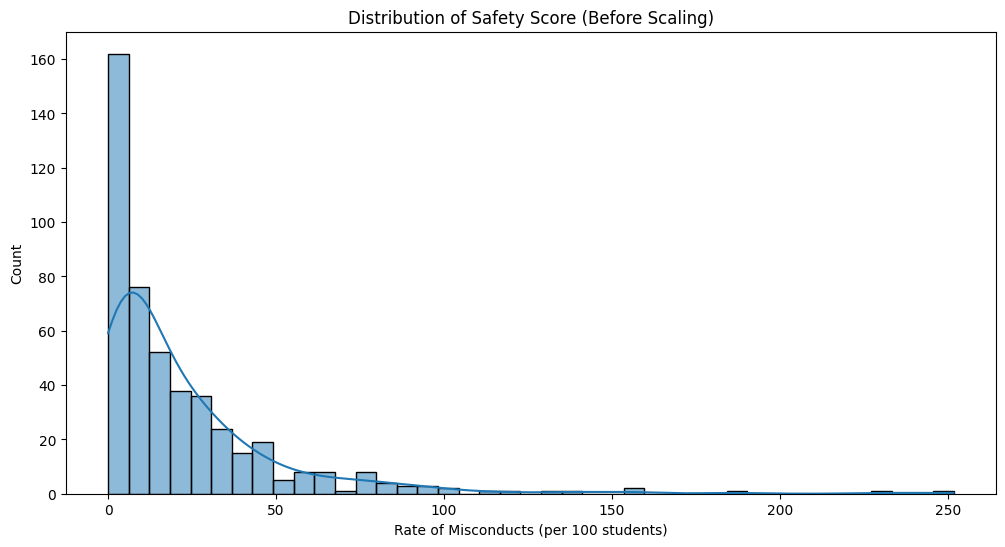

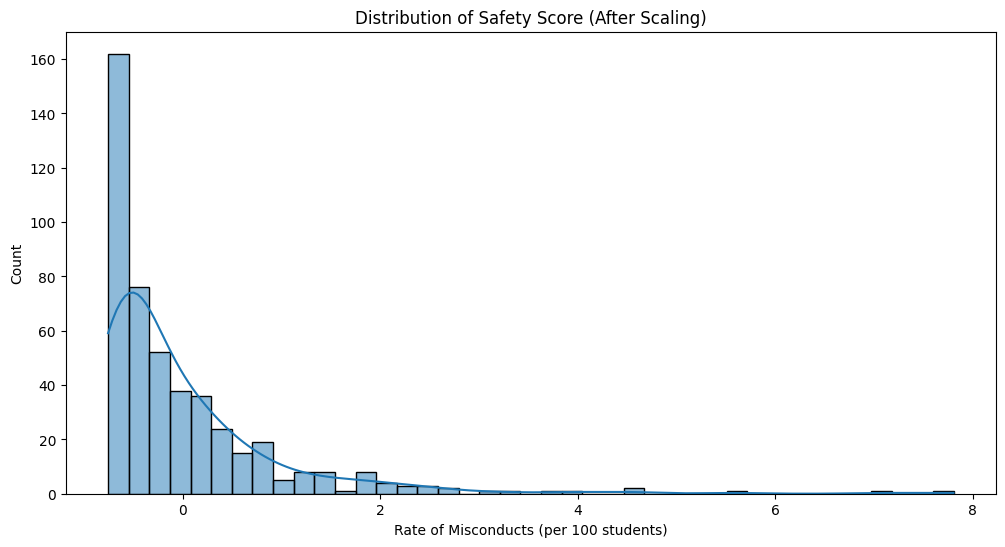

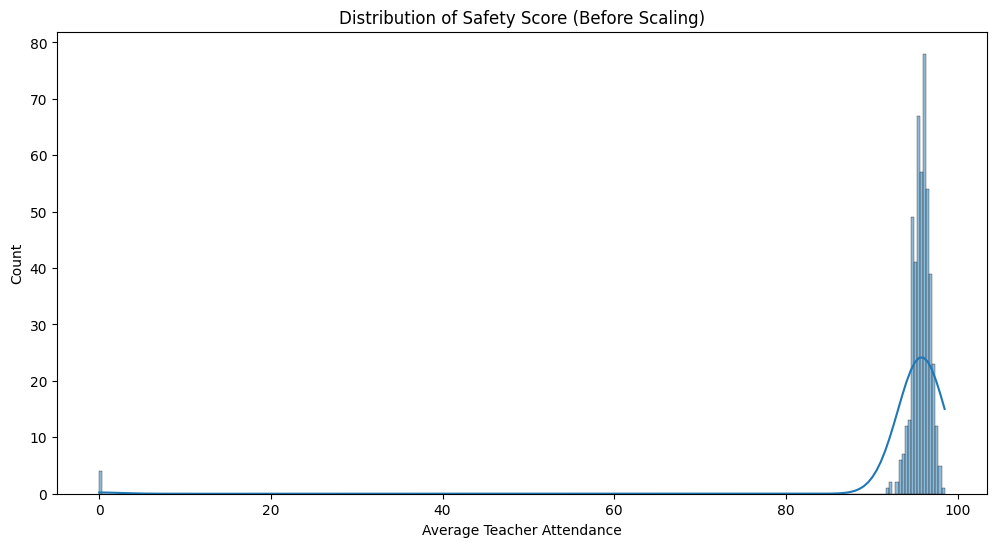

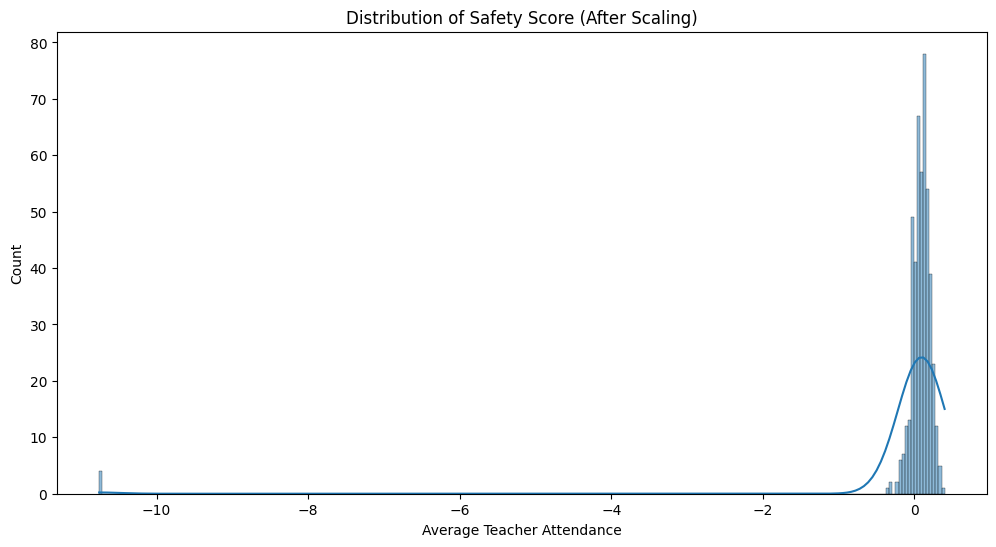

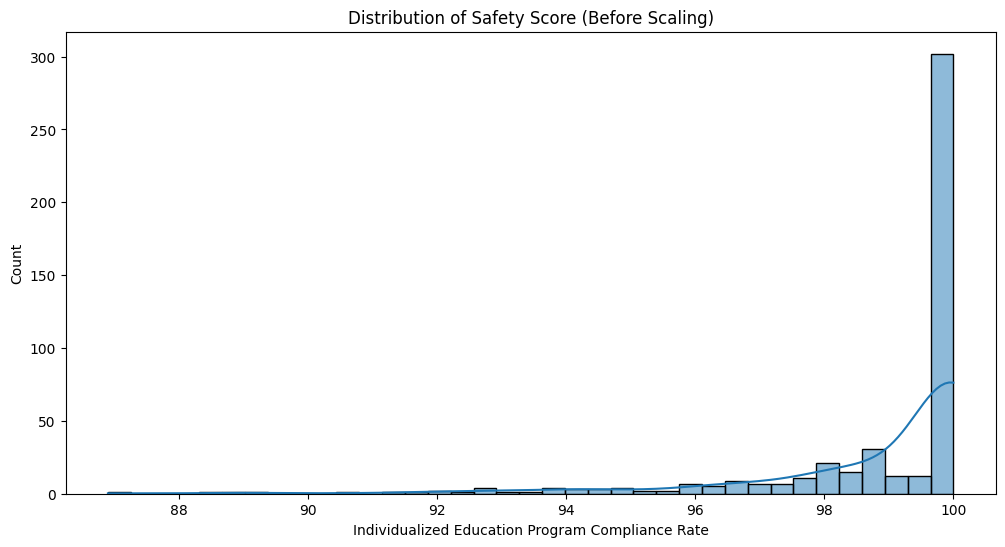

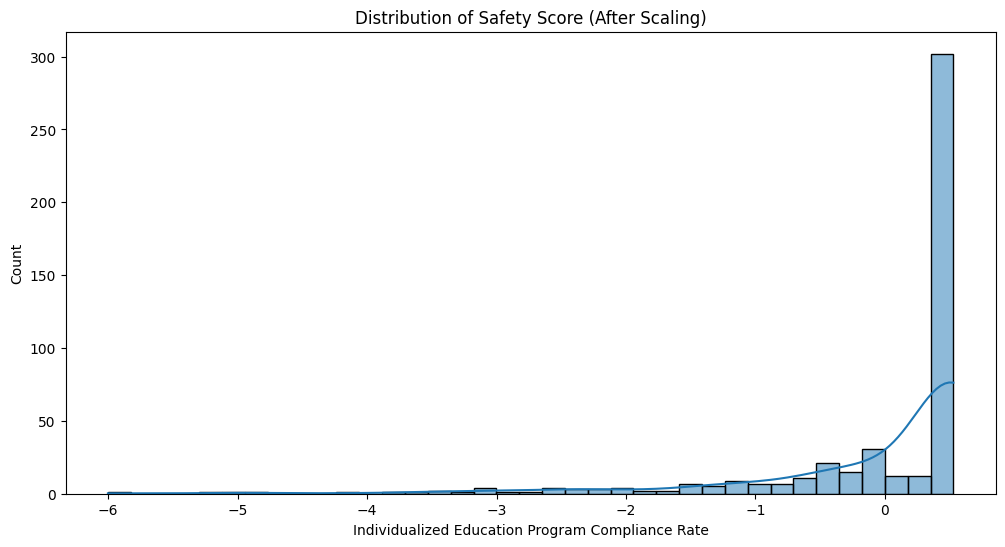

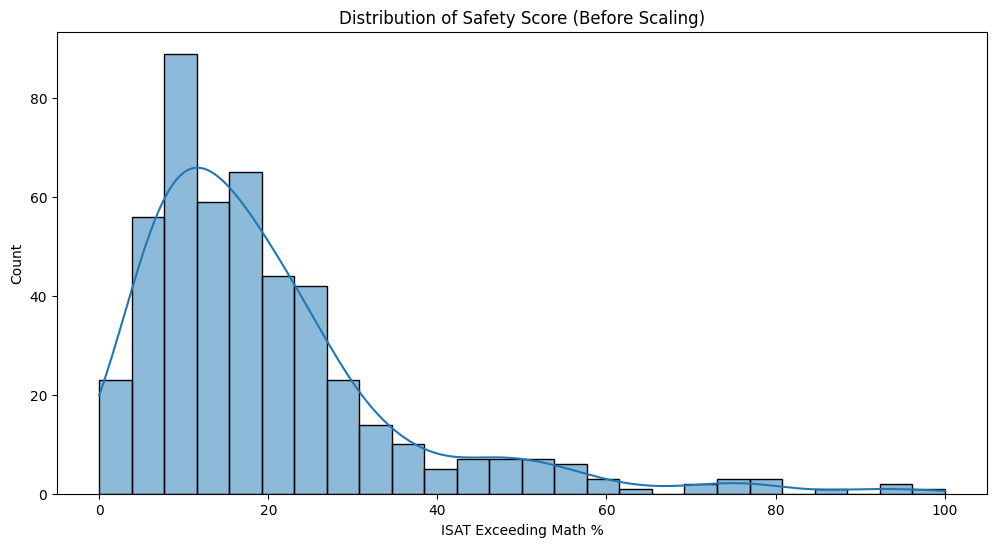

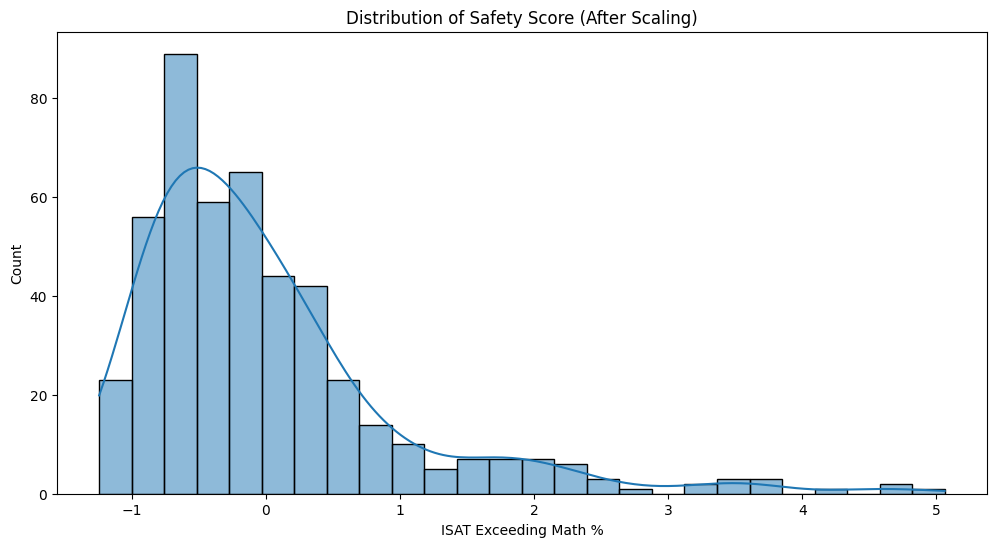

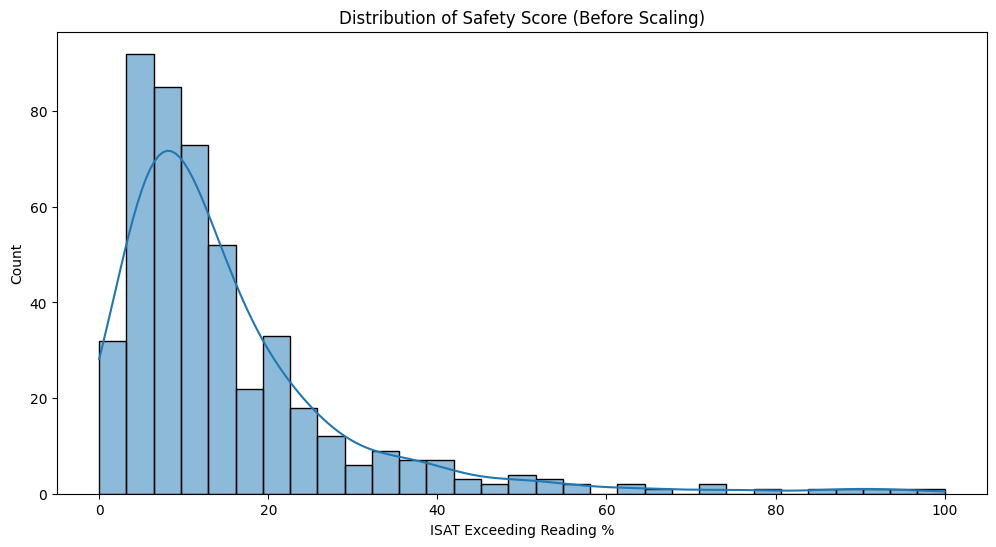

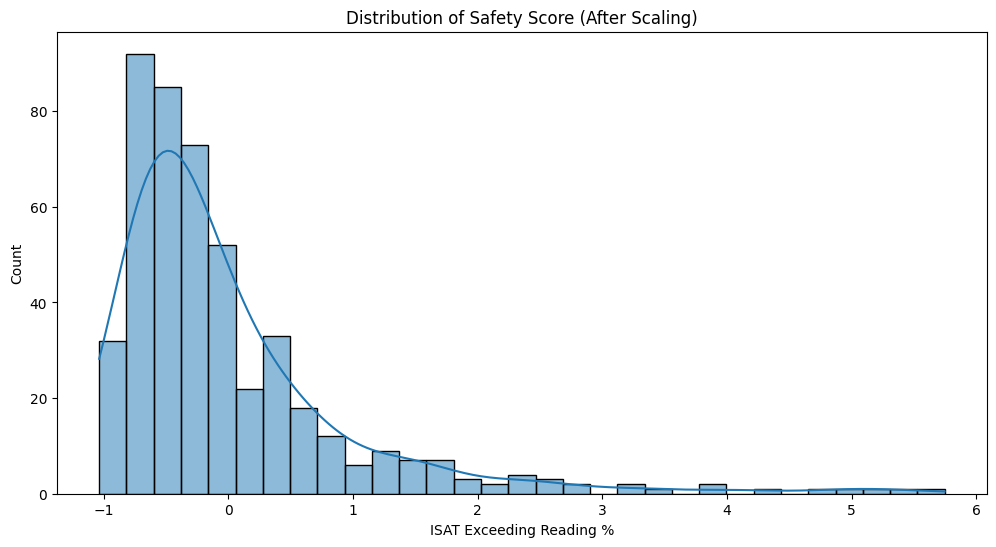

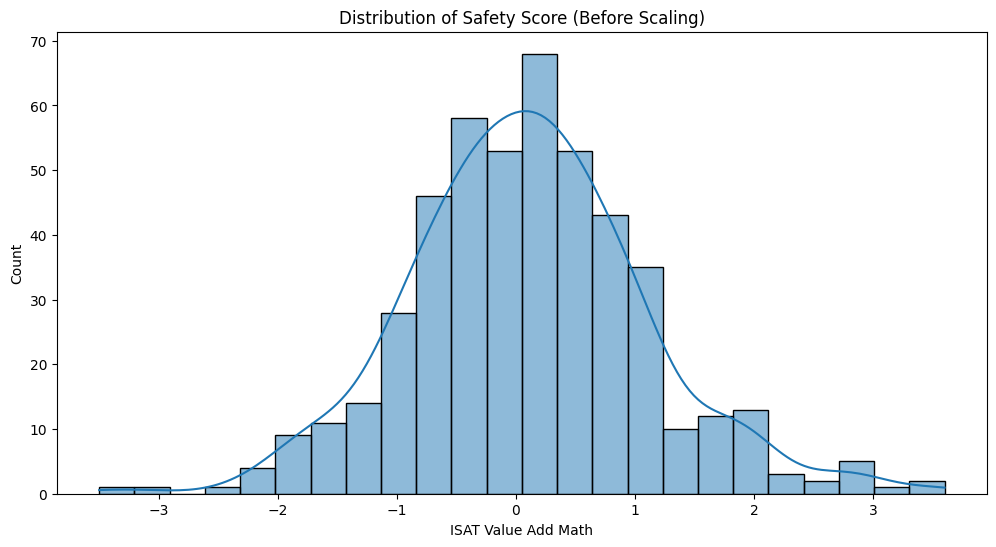

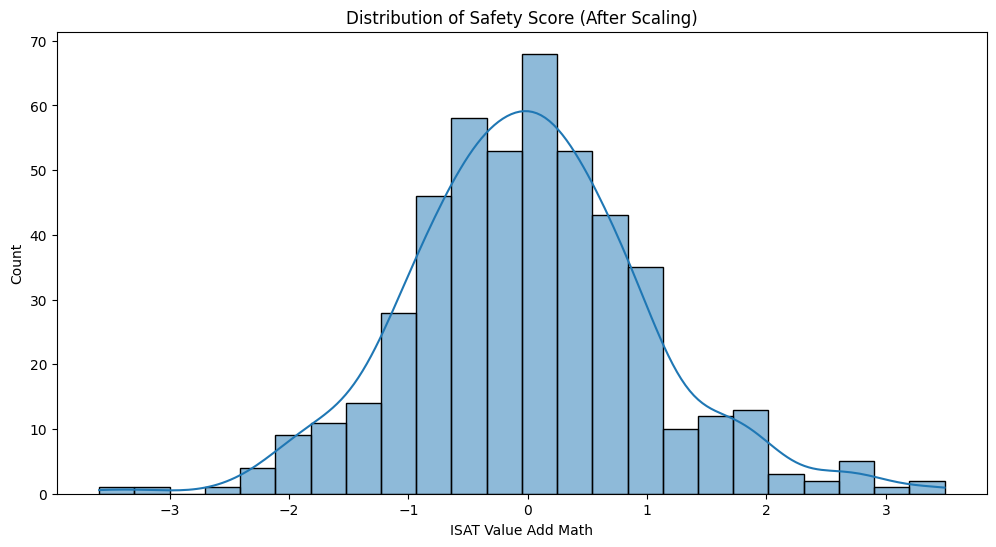

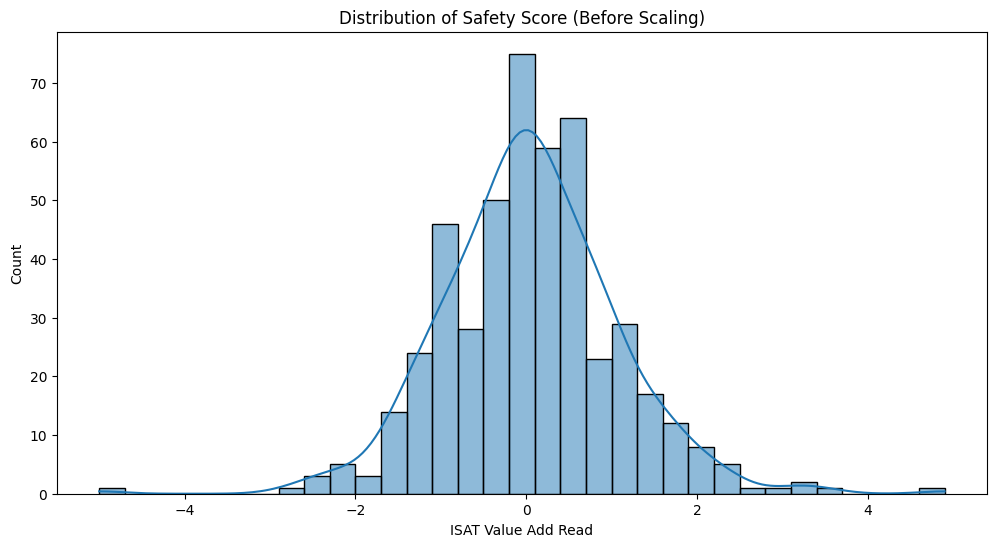

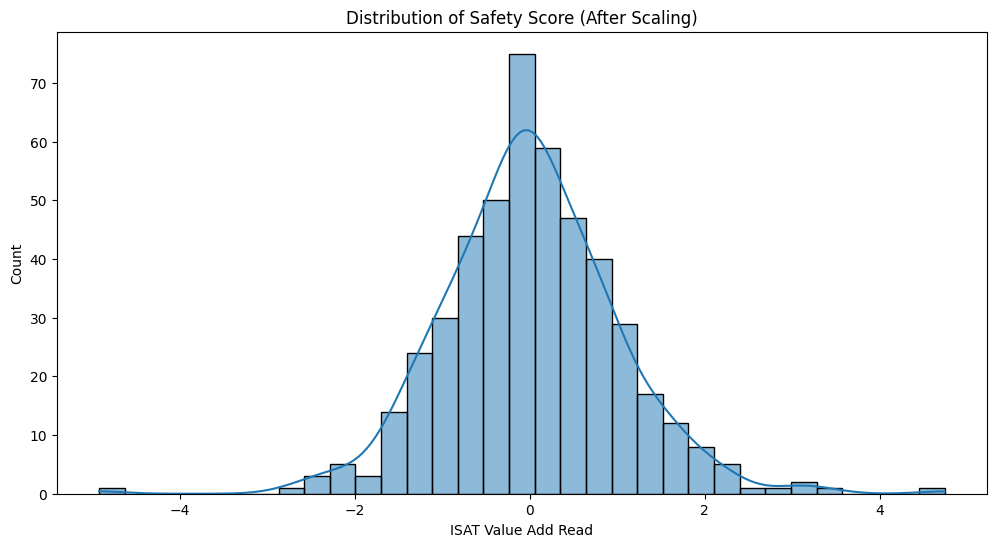

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in numerical_columns:
# Plot distributions before scaling
  plt.figure(figsize=(12, 6))
  sns.histplot(df[col], kde=True, label='Before Scaling')
  plt.title("Distribution of Safety Score (Before Scaling)")
  plt.show()

  # Plot distributions after scaling
  plt.figure(figsize=(12, 6))
  sns.histplot(df_scaled[col], kde=True, label='After Scaling')
  plt.title("Distribution of Safety Score (After Scaling)")
  plt.show()

In [ ]:
# Summary statistics before scaling
print("Before Scaling:")
print(df[numerical_columns].describe().loc[['mean', 'std']])

# Summary statistics after scaling
print("After Scaling:")
print(df_scaled[numerical_columns].describe().loc[['mean', 'std']])

Before Scaling:
      Safety Score  Family Involvement Score  Environment Score  \
mean     49.245243                 50.118393          48.156448   
std      19.237672                 13.647606          15.582233   

      Instruction Score  Teachers Score  Parent Engagement Score  \
mean          49.069767       49.023256                50.048626   
std           16.896664       13.096508                 4.598701   

      Parent Environment Score  Average Student Attendance  \
mean                 50.264271                   94.039746   
std                   4.235635                    3.040919   

      Rate of Misconducts (per 100 students)  Average Teacher Attendance  \
mean                               22.165116                   94.968710   
std                                29.430773                    8.837521   

      Individualized Education Program Compliance Rate  ISAT Exceeding Math %  \
mean                                         98.940169              19.720613   

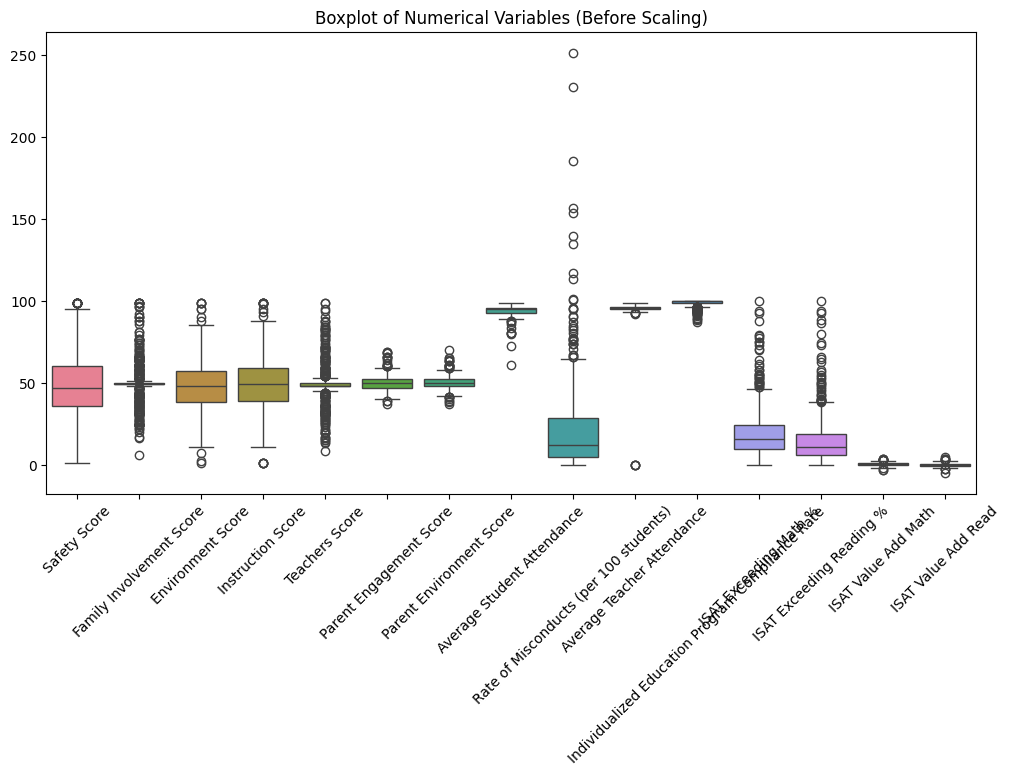

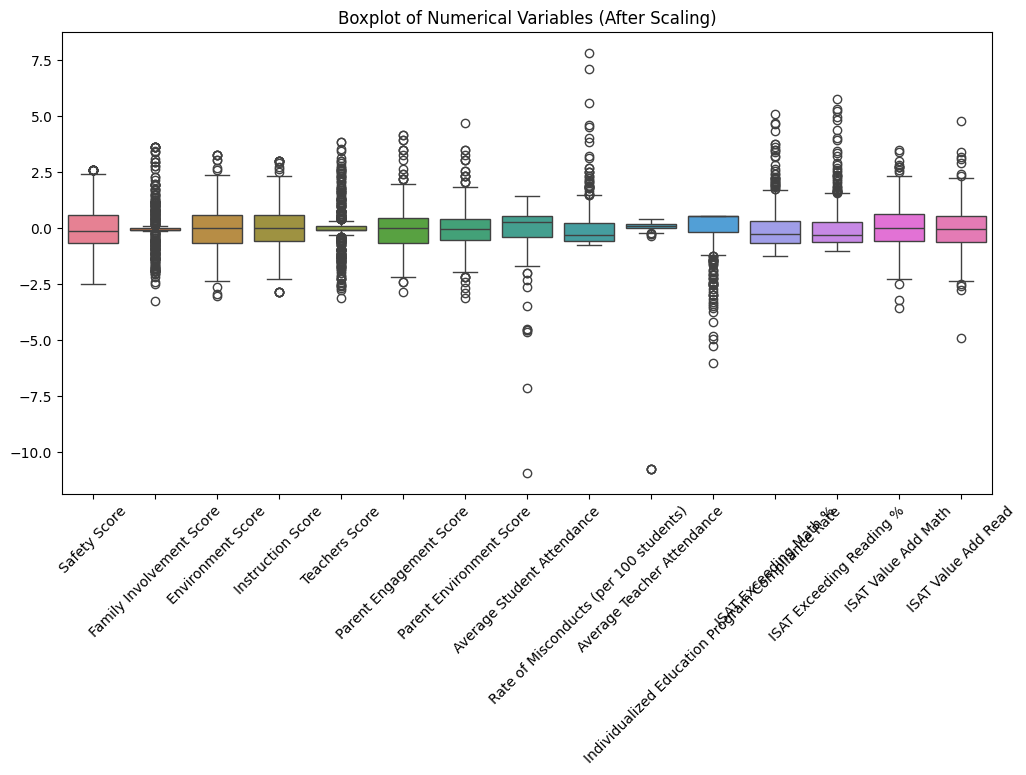

In [ ]:
# Boxplot before scaling
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.title("Boxplot of Numerical Variables (Before Scaling)")
plt.xticks(rotation=45)
plt.show()

# Boxplot after scaling
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled[numerical_columns])
plt.title("Boxplot of Numerical Variables (After Scaling)")
plt.xticks(rotation=45)
plt.show()

# Model Building

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


X = df.drop('Safety Score', axis=1)  # Remove the extra space
y = df['Safety Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features (optional for tree-based models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ======================
# 2. Model Training
# ======================
models = {}

# A. Linear Models
from sklearn.linear_model import LinearRegression, Lasso
models['OLS'] = LinearRegression().fit(X_train_scaled, y_train)
models['Lasso'] = Lasso(alpha=0.01).fit(X_train_scaled, y_train)  # Tuned alpha

# B. GAM
from pygam import LinearGAM
models['GAM'] = LinearGAM(n_splines=25).gridsearch(X_train.values, y_train.values)

# C. Tree-Based Models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
models['Random Forest'] = RandomForestRegressor(
    max_depth=10, n_estimators=100, random_state=42
).fit(X_train, y_train)
models['XGBoost'] = XGBRegressor(
    max_depth=3, learning_rate=0.01, n_estimators=300
).fit(X_train, y_train)

# D. SVM
from sklearn.svm import SVR
models['SVM'] = SVR(kernel='linear').fit(X_train_scaled, y_train)

# E. Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Linear output for regression
])
nn_model.compile(optimizer='adam', loss='mse')
models['Deep Learning'] = nn_model.fit(
    X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0
)

# ======================
# 3. Evaluation
# ======================
results = []

for name, model in models.items():
    # Handle different model types
    if name == 'GAM':
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
    elif name == 'Deep Learning':
        y_pred_train = model.model.predict(X_train_scaled).flatten()
        y_pred_test = model.model.predict(X_test_scaled).flatten()
    else:
        X_eval = X_train_scaled if name in ['OLS', 'Lasso', 'SVM'] else X_train
        y_pred_train = model.predict(X_eval)
        X_eval_test = X_test_scaled if name in ['OLS', 'Lasso', 'SVM'] else X_test
        y_pred_test = model.predict(X_eval_test)

    # Calculate metrics
    results.append({
        'Model': name,
        'Train R²': r2_score(y_train, y_pred_train),
        'Test R²': r2_score(y_test, y_pred_test),
        'Train MAE': mean_absolute_error(y_train, y_pred_train),
        'Test MAE': mean_absolute_error(y_test, y_pred_test),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test))
    })

# ======================
# 4. Results Comparison
# ======================
results_df = pd.DataFrame(results).set_index('Model')
print(results_df.sort_values(by='Test R²', ascending=False))

# Save results
results_df.to_csv('model_results_comparison.csv')

100% (11 of 11) |########################| Elapsed Time: 0:00:09 Time:  0:00:09


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
               Train R²   Test R²  Train MAE  Test MAE  Train RMSE  Test RMSE
Model                                                                        
XGBoost        0.946031  0.922824   3.535801  4.082628    4.492511   5.161067
Random Forest  0.988820  0.921545   1.614936  4.147990    2.044748   5.203651
Lasso          0.914857  0.913463   4.590285  4.432990    5.642736   5.465115
OLS            0.914907  0.912900   4.594831  4.442988    5.641077   5.482857
SVM            0.906340  0.905133   4.583953  4.623501    5.918244   5.722099
GAM            0.941649  0.858395   3.727577  5.479039    4.671315   6.990985
Deep Learning  0.840106  0.751664   6.035296  7.327571    7.732733   9.258038


<Figure size 1200x800 with 0 Axes>

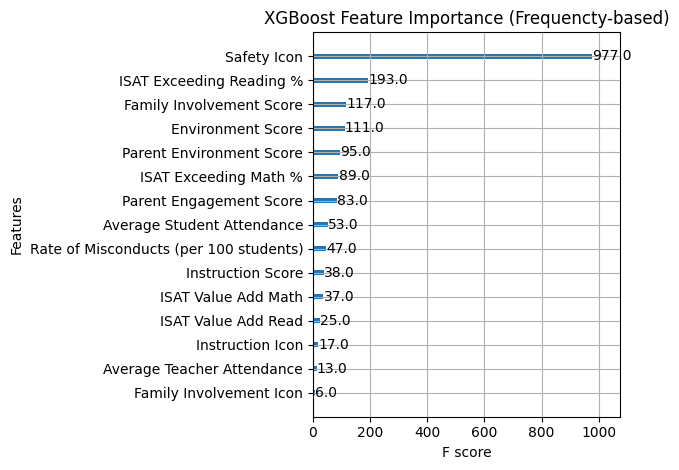

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(12, 8))
plot_importance(models['XGBoost'], importance_type='weight', max_num_features=15)
plt.title('XGBoost Feature Importance (Frequencty-based)')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


X = df.drop('ISAT Exceeding Math %', axis=1)  # Remove the extra space
y = df['ISAT Exceeding Math %']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features (optional for tree-based models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ======================
# 2. Model Training
# ======================
models = {}

# A. Linear Models
from sklearn.linear_model import LinearRegression, Lasso
models['OLS'] = LinearRegression().fit(X_train_scaled, y_train)
models['Lasso'] = Lasso(alpha=0.01).fit(X_train_scaled, y_train)  # Tuned alpha

# B. GAM
from pygam import LinearGAM
models['GAM'] = LinearGAM(n_splines=25).gridsearch(X_train.values, y_train.values)

# C. Tree-Based Models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
models['Random Forest'] = RandomForestRegressor(
    max_depth=10, n_estimators=100, random_state=42
).fit(X_train, y_train)
models['XGBoost'] = XGBRegressor(
    max_depth=3, learning_rate=0.01, n_estimators=300
).fit(X_train, y_train)

# D. SVM
from sklearn.svm import SVR
models['SVM'] = SVR(kernel='linear').fit(X_train_scaled, y_train)

# E. Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Linear output for regression
])
nn_model.compile(optimizer='adam', loss='mse')
models['Deep Learning'] = nn_model.fit(
    X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0
)

# ======================
# 3. Evaluation
# ======================
results = []

for name, model in models.items():
    # Handle different model types
    if name == 'GAM':
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
    elif name == 'Deep Learning':
        y_pred_train = model.model.predict(X_train_scaled).flatten()
        y_pred_test = model.model.predict(X_test_scaled).flatten()
    else:
        X_eval = X_train_scaled if name in ['OLS', 'Lasso', 'SVM'] else X_train
        y_pred_train = model.predict(X_eval)
        X_eval_test = X_test_scaled if name in ['OLS', 'Lasso', 'SVM'] else X_test
        y_pred_test = model.predict(X_eval_test)

    # Calculate metrics
    results.append({
        'Model': name,
        'Train R²': r2_score(y_train, y_pred_train),
        'Test R²': r2_score(y_test, y_pred_test),
        'Train MAE': mean_absolute_error(y_train, y_pred_train),
        'Test MAE': mean_absolute_error(y_test, y_pred_test),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test))
    })

# ======================
# 4. Results Comparison
# ======================
results_df = pd.DataFrame(results).set_index('Model')
print(results_df.sort_values(by='Test R²', ascending=False))

# Save results
results_df.to_csv('model_results_comparison.csv')

100% (11 of 11) |########################| Elapsed Time: 0:00:10 Time:  0:00:10


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
               Train R²   Test R²  Train MAE  Test MAE  Train RMSE  Test RMSE
Model                                                                        
SVM            0.913515  0.896330   3.354503  3.247017    4.808509   4.274501
Lasso          0.916249  0.891697   3.440943  3.292956    4.731893   4.368976
OLS            0.916288  0.891295   3.442036  3.306795    4.730787   4.377078
Random Forest  0.979927  0.877511   1.703192  3.567798    2.316570   4.646309
XGBoost        0.932945  0.864497   3.130170  3.789474    4.234040   4.886905
Deep Learning  0.915530  0.848085   3.485456  4.014930    4.752161   5.174389
GAM            0.936205  0.802538   3.027094  4.476269    4.129851   5.899305


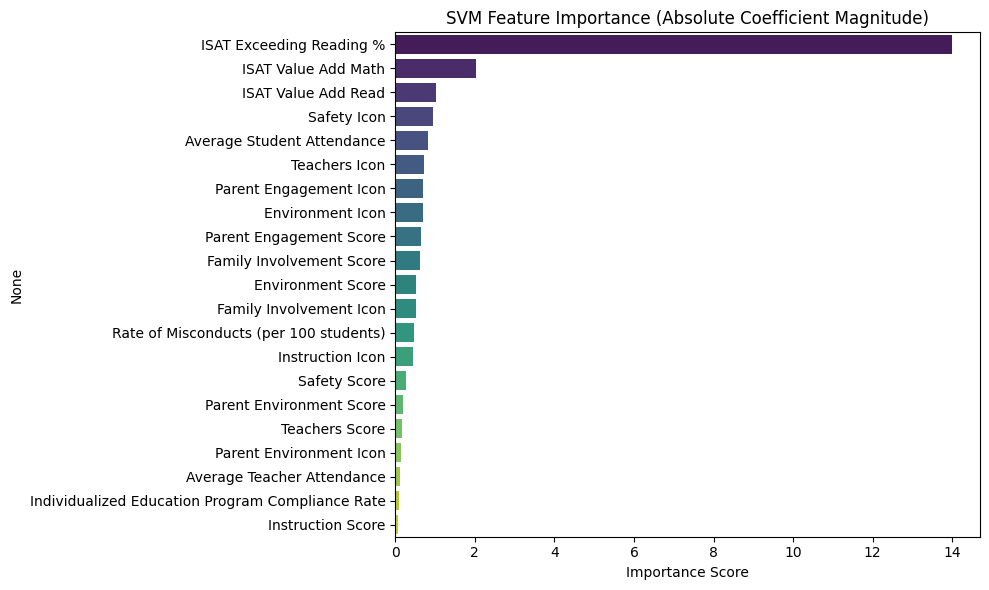

In [ ]:
# Get SVM coefficients (absolute values)
svm_importance = pd.Series(
    np.abs(models['SVM'].coef_.flatten()),
    index=X.columns
).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=svm_importance.values, y=svm_importance.index, palette='viridis')
plt.title("SVM Feature Importance (Absolute Coefficient Magnitude)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

Rank-Ordered Feature Importance:
                                         Feature  Importance Score  Rank
                        ISAT Exceeding Reading %         13.995502     1
                             ISAT Value Add Math          2.035741     2
                             ISAT Value Add Read          1.016559     3
                                     Safety Icon          0.956632     4
                      Average Student Attendance          0.836929     5
                                   Teachers Icon          0.724479     6
                          Parent Engagement Icon          0.710540     7
                                Environment Icon          0.702771     8
                         Parent Engagement Score          0.651319     9
                        Family Involvement Score          0.624107    10
                               Environment Score          0.532227    11
                         Family Involvement Icon          0.517667    12
          Rate of 

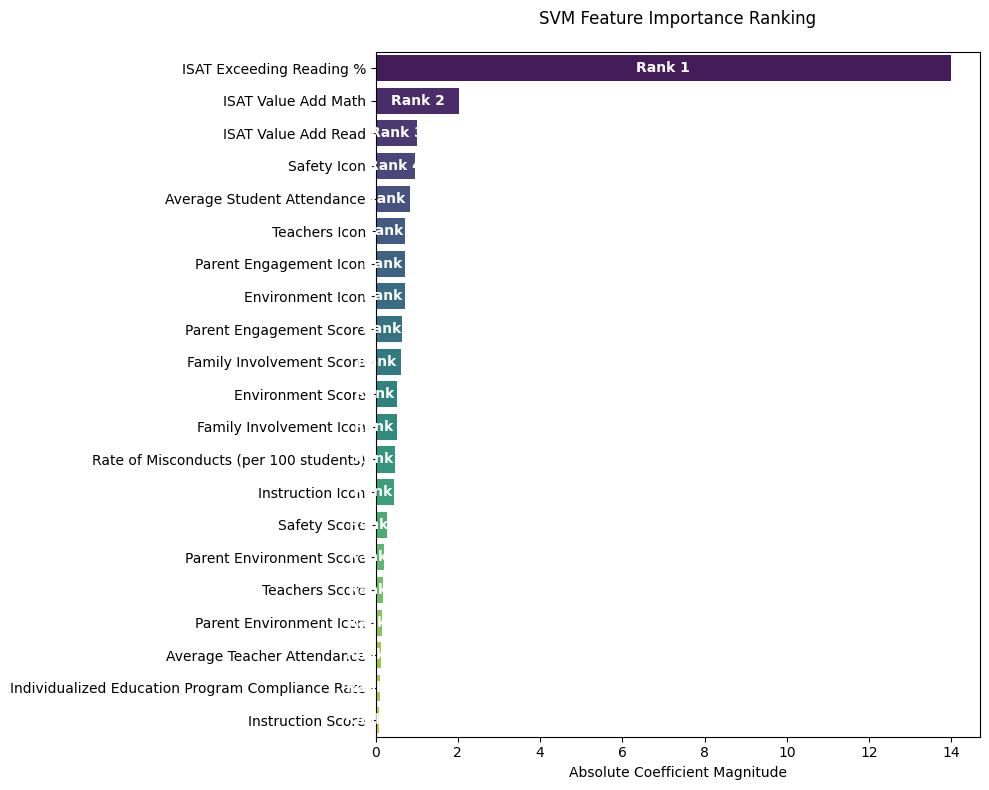

Rank-Ordered Feature Importance:
                                         Feature  Importance Score  Rank
                        ISAT Exceeding Reading %         13.995502     1
                             ISAT Value Add Math          2.035741     2
                             ISAT Value Add Read          1.016559     3
                                     Safety Icon          0.956632     4
                      Average Student Attendance          0.836929     5
                                   Teachers Icon          0.724479     6
                          Parent Engagement Icon          0.710540     7
                                Environment Icon          0.702771     8
                         Parent Engagement Score          0.651319     9
                        Family Involvement Score          0.624107    10
                               Environment Score          0.532227    11
                         Family Involvement Icon          0.517667    12
          Rate of 

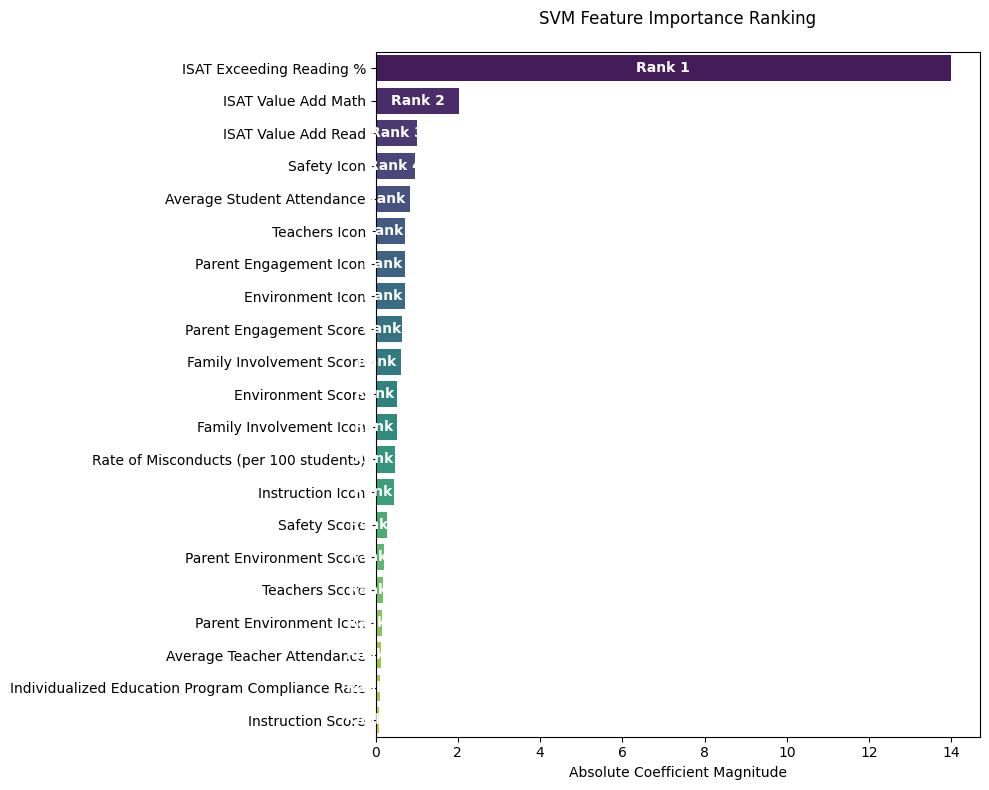

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get SVM coefficients and rank them
svm_coef = pd.Series(np.abs(models['SVM'].coef_.flatten()), index=X.columns)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get SVM coefficients and rank them
svm_coef = pd.Series(np.abs(models['SVM'].coef_.flatten()), index=X.columns)
ranked_features = svm_coef.sort_values(ascending=False).reset_index()
ranked_features.columns = ['Feature', 'Importance Score']
ranked_features['Rank'] = np.arange(1, len(ranked_features)+1)

# 2. Print ranked table
print("Rank-Ordered Feature Importance:")
print(ranked_features.to_string(index=False))

# 3. Visualize (horizontal bar plot)
plt.figure(figsize=(10,8))
sns.barplot(x='Importance Score', y='Feature',
            data=ranked_features,
            palette='viridis',
            order=ranked_features['Feature'])
plt.title('SVM Feature Importance Ranking', pad=20)
plt.xlabel('Absolute Coefficient Magnitude')
plt.ylabel('')

# Add rank numbers to bars
for i, (score, rank) in enumerate(zip(ranked_features['Importance Score'],
                                    ranked_features['Rank'])):
    plt.text(score/2, i, f"Rank {rank}",
             va='center', ha='center',
             color='white', fontweight='bold')

plt.tight_layout()
plt.show()

# 4. Export to CSV
ranked_features.to_csv('svm_feature_ranking.csv', index=False)
print("Rank-Ordered Feature Importance:")
print(ranked_features.to_string(index=False))

# 3. Visualize (horizontal bar plot)
plt.figure(figsize=(10,8))
sns.barplot(x='Importance Score', y='Feature',
            data=ranked_features,
            palette='viridis',
            order=ranked_features['Feature'])
plt.title('SVM Feature Importance Ranking', pad=20)
plt.xlabel('Absolute Coefficient Magnitude')
plt.ylabel('')

# Add rank numbers to bars
for i, (score, rank) in enumerate(zip(ranked_features['Importance Score'],
                                    ranked_features['Rank'])):
    plt.text(score/2, i, f"Rank {rank}",
             va='center', ha='center',
             color='white', fontweight='bold')

plt.tight_layout()
plt.show()

# 4. Export to CSV
ranked_features.to_csv('svm_feature_ranking.csv', index=False)